Verwendung des [Online Retail-Datensatzes](https://archive.ics.uci.edu/ml/datasets/Online+Retail) aus dem UCI Machine Learning Repository für die explorative Datenanalyse, ***Kundensegmentierung***, ***RFM-Analyse***, ***K-Means Clustering*** und ***Kohortenanalyse***.

Dies ist ein länderübergreifender Datensatz, der alle Transaktionen zwischen dem 01.12.2010 und dem 09.12.2011 für einen in Großbritannien ansässigen und registrierten Non-Store-Online-Handel enthält. Das Unternehmen verkauft hauptsächlich einzigartige Geschenke für alle Anlässe. Viele Kunden des Unternehmens sind Großhändler.

Informationen zum Merkmal:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.

## Projekt-Strukturen

- Datenbereinigung & Explorative Datenanalyse
- RFM-Analyse
- Kundensegmentierung
- K-Means-Clustering anwenden
- Kohorte erstellen und Kohortenanalyse durchführen

## 1. Datenbereinigung & Explorative Datenanalyse

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)   

import re
import string 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<font color='Red'>Daten importieren</font>

In [3]:
df = pd.read_excel("Online Retail.xlsx")

<font color='Red'>Eine andere Alternative zum leichteren Einlesen </font>

In [ ]:
# df = pd.read_excel("Online Retail.xlsx")
# df.to_csv('Online_Retail.csv')

In [5]:
df.shape

(541909, 8)

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<font color='Red'>Eine Funktion über Erklärungen </font>

In [6]:
def explain(attribute):
    features= {'InvoiceNo': "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.",
    'StockCode': 'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.',
    'Description': 'Product (item) name. Nominal.',
    'Quantity': 'The quantities of each product (item) per transaction. Numeric.',
    'InvoiceDate': 'Invice Date and time. Numeric, the day and time when each transaction was generated.',
    'UnitPrice': 'Unit price. Numeric, Product price per unit in sterling.',
    'CustomerID': 'Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.',
    'Country': 'Country name. Nominal, the name of the country where each customer resides.'}
    return features[attribute]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    object        
 1   StockCode    object        
 2   Description  object        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000,541909.000,406829.000
mean,9.552,4.611,15287.691
std,218.081,96.760,1713.600
min,-80995.000,-11062.060,12346.000
25%,1.000,1.250,13953.000
50%,3.000,2.080,15152.000
75%,10.000,4.130,16791.000
max,80995.000,38970.000,18287.000


<font color='Red'>Alternativ</font>

In [10]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(df).sort_values(by='Nulls', ascending=False))

Data shape: (541909, 8)
___________________________
Data Types:
object            4
float64           2
datetime64[ns]    1
int64             1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
CustomerID,float64,406829,4373,135080,12346.000,18287.000
Description,object,540455,4224,1454,NaN,NaN
Country,object,541909,38,0,Australia,Unspecified
InvoiceDate,datetime64[ns],541909,23260,0,2010-12-01 08:26:00,2011-12-09 12:50:00
InvoiceNo,object,541909,25900,0,NaN,NaN
Quantity,int64,541909,722,0,-80995,80995
StockCode,object,541909,4070,0,NaN,NaN
UnitPrice,float64,541909,1630,0,-11062.060,38970.000


<font color='Red'>Prüfung von NaN-Werten</font>

In [6]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records,Percentage (%)
CustomerID,135080,24.926694
Description,1454,0.268311


<font color='Red'>Zur statistischen Analyse kategorialer Daten  </font>

In [11]:
df.describe(include=['O']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


**Auswertungen:**
* Die Felder `CustomerID` und `Description` haben Nullwerte.
* `Quantity` und `UnitPrice` sollten einen Wert >= 0 haben, aber aus der obigen Zusammenfassung ergeben sich negative Werte für die beiden Spalten.

<font color='Red'> Korrelation zwischen Variablen </font>

In [12]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000,-0.001,-0.004
UnitPrice,-0.001,1.000,-0.005
CustomerID,-0.004,-0.005,1.000


<font color='red'>Prüfung der Spalte "InvoiceNo"  </font>

In [17]:
df[["InvoiceNo"]].sample(5)

,InvoiceNo
410731,572127
154918,549954
45619,C540270
303527,563549
325650,565447


#### Wir sehen, dass es negative Werte in den Spalten "Quantity " und "UnitPrice " gibt. Dies sind möglicherweise stornierte und zurückgegebene Aufträge. Schauen wir uns das mal an.

Wenn wir stornierte Aufträge nach Quantity> 0 oder nicht stornierte Aufträge nach Quantity <0 filtern, kommt nichts zurück, was bestätigt, dass negative Werte bedeuten, dass der Auftrag storniert wurde. 

9288 der Aufträge wurden storniert. Eine genauere Untersuchung, warum diese Aufträge storniert wurden, kann zukünftige Stornierungen verhindern. Lassen wir uns nun herausfinden, was ein negativer UnitPrice bedeutet.

<font color='red'>zählt die negativen Werte in Quantity </font>

In [11]:
df[df['Quantity'] < 0].shape[0]

10624

In [18]:
df[df['Quantity'] < 0].sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
129738,C547388,37448,CERAMIC CAKE DESIGN SPOTTED MUG,-12,2011-03-22 16:07:00,1.490,12352.000,Norway
140988,C548495,21528,DAIRY MAID TRADITIONAL TEAPOT,-1,2011-03-31 13:34:00,6.950,17075.000,United Kingdom


In [19]:
df[df['UnitPrice'] < 0].shape[0]

2

In [20]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.060,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.060,nan,United Kingdom


In [22]:
df[df['InvoiceNo'].str.startswith('C', na=False)]
# df[df.InvoiceNo.str.contains('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.000,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.000,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.000,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397.000,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.690,15498.000,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311.000,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315.000,United Kingdom


<font color='Red'> Wenn die InvoiceNo mit dem Buchstaben "C" beginnt, bedeutet dies, dass die Bestellung storniert wurde. Durchschnitt von UnitPrice;</font>

In [21]:
explain('InvoiceNo')

"Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation."

In [23]:
df[df.InvoiceNo.str.contains('C')==True]['UnitPrice'].mean()

48.393660637381565

In [24]:
df[df["InvoiceNo"].str.contains("A")==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.060,nan,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.060,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.060,nan,United Kingdom


Es gibt zwei Beispielen, die einen negativen UnitPrice haben und die Beschreibung beider ist Forderungsausfall anpassen, in diesem Fall hat der Kunde seine Forderung nicht bezahlt.

In [25]:
df[(df["Quantity"] < 0) & (df["InvoiceNo"].str.contains("C")==True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.000,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.000,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.000,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.000,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397.000,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.690,15498.000,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311.000,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315.000,United Kingdom


### Umgang mit fehlenden Werten

Da die customer ID's fehlen, gehen wir davon aus, dass diese Bestellungen nicht von den bereits im Datensatz enthaltenen Kunden getätigt wurden, da diese Kunden bereits IDs haben. 

Wir wollen diese Bestellungen auch nicht diesen Kunden zuordnen, da dies die Erkenntnisse, die wir aus den Daten ziehen, verändern würde.

<font color='Red'> Löschung von Null Werten </font>

In [26]:
df[df["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.000,nan,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.510,nan,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.510,nan,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.850,nan,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.660,nan,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.130,nan,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.130,nan,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.960,nan,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.790,nan,United Kingdom


In [27]:
df.shape

(541909, 8)

In [28]:
df.dropna(subset=["CustomerID"], inplace=True)
# df = df[df.CustomerID.notnull()]

In [29]:
df.shape

(406829, 8)

### Entdeckung der Aufträge


<font color='Red'>Die eindeutige Nummer der InvoiceNo pro Kunde  </font>

In [30]:
df.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False)

CustomerID
14911.000    248
12748.000    224
17841.000    169
14606.000    128
13089.000    118
            ... 
13828.000      1
13829.000      1
16123.000      1
13833.000      1
15300.000      1
Name: InvoiceNo, Length: 4372, dtype: int64

<font color='Red'>Die durchschnittliche Anzahl von einzigartigen Produkten je Order</font>

In [21]:
per_order = df.groupby("InvoiceNo")["StockCode"].nunique().mean()
print(f"Die durchschnittliche Anzahl von Produkten je InvoiceNO :{per_order}")

Die durchschnittliche Anzahl von Produkten je InvoiceNO :17.87656602073006


<font color='Red'>Durchschnitt der eindeutigen Anzahl der Produkte jedes Kunden in jeder Bestellung </font>

In [32]:
mean_of_unique_items= round(df.groupby(['CustomerID',
                      'InvoiceNo']).agg({'StockCode':lambda x:x.nunique()}).groupby('CustomerID')['StockCode'].mean(),
                      1).sort_values(ascending=False)
mean_of_unique_items

CustomerID
12378.000   219.000
12688.000   171.000
15464.000   155.000
15004.000   154.000
14096.000   149.900
              ...  
17747.000     1.000
13270.000     1.000
17752.000     1.000
13017.000     1.000
12346.000     1.000
Name: StockCode, Length: 4372, dtype: float64

<font color='Red'>Die durchschnittliche Anzahl von einzigartigen Produkten je Kunden</font>

In [33]:
per_cust = df.groupby("CustomerID")["StockCode"].nunique().mean()
print(f"Die durchschnittliche Anzahl von Produkten je Kunden :{per_cust}")

Die durchschnittliche Anzahl von Produkten je Kunden :61.21111619396157


In [34]:
# Anzahl der von jedem Kunden gekauften Einzelprodukte
num_of_unique_product= pd.DataFrame(df.groupby('CustomerID').StockCode.nunique()).rename(columns={'StockCode':'num_of_unique_product'})

# Anzahl der Bestellungen für jeden Kunden
num_of_order = df.groupby('CustomerID').InvoiceNo.nunique()

In [35]:
pd.concat([mean_of_unique_items,
           num_of_order,
           num_of_unique_product],
           axis=1).rename(columns={'StockCode': "mean_of_unique_items",
                                   'InvoiceNo': 'num_of_order'}).sort_values('num_of_order', ascending=False)

,mean_of_unique_items,num_of_order,num_of_unique_product
CustomerID,,,
14911.000,23.800,248,1794
12748.000,19.300,224,1769
17841.000,45.000,169,1331
14606.000,21.400,128,832
13089.000,15.700,118,636
...,...,...,...
13877.000,3.000,1,3
16400.000,28.000,1,28
13878.000,35.000,1,35


### Erkunden der Kunden nach Land

<font color='Red'>Wie hoch ist der Gesamtumsatz pro Land?</font>

In [36]:
df["total_preis"] = df.UnitPrice * df.Quantity
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [37]:
df.groupby("Country")["total_preis"].sum().sort_values(ascending=False).head(10)

Country
United Kingdom   6767873.394
Netherlands       284661.540
EIRE              250285.220
Germany           221698.210
France            196712.840
Australia         137077.270
Switzerland        55739.400
Spain              54774.580
Belgium            40910.960
Sweden             36595.910
Name: total_preis, dtype: float64

In [40]:
df2=pd.DataFrame(df.groupby('Country').total_preis.sum().apply(lambda x: round(x,2))).sort_values('total_preis',ascending=False)
# df2=df.groupby('Country').agg({'total_preis': lambda x: x.sum()}).sort_values('total_preis',ascending=False)

df2['Perc_of_total_preis']=round(df2.total_preis/df2.total_preis.sum()*100,2)
df2.head(10)

,total_preis,Perc_of_total_preis
Country,,
United Kingdom,6767873.390,81.540
Netherlands,284661.540,3.430
EIRE,250285.220,3.020
Germany,221698.210,2.670
France,196712.840,2.370
Australia,137077.270,1.650
Switzerland,55739.400,0.670
Spain,54774.580,0.660
Belgium,40910.960,0.490


In [41]:
df2['customer_num']=df.groupby('Country').CustomerID.nunique()
df2['customer_rate']=round(df2.customer_num/df2.customer_num.sum()*100,2)
df2.head(5)

,total_preis,Perc_of_total_preis,customer_num,customer_rate
Country,,,,
United Kingdom,6767873.390,81.540,3950,90.180
Netherlands,284661.540,3.430,9,0.210
EIRE,250285.220,3.020,3,0.070
Germany,221698.210,2.670,95,2.170
France,196712.840,2.370,87,1.990


<font color='Red'>Visualisierung der Anzahl der Kunden pro Land  </font>

<AxesSubplot:xlabel='Die Anzahl der Kunden', ylabel='Country'>

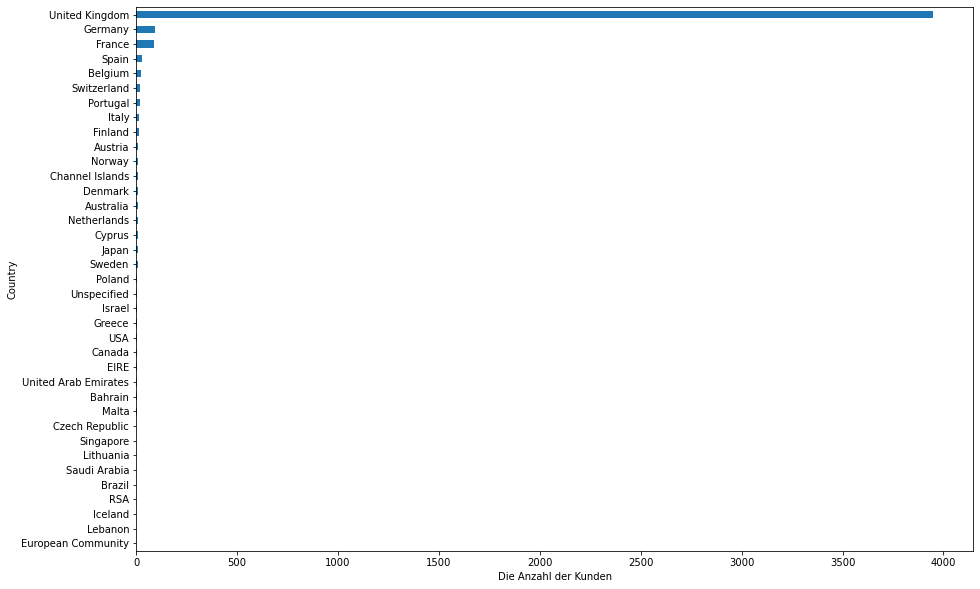

In [42]:
plt.figure(figsize=(15,10))
plt.xlabel("Die Anzahl der Kunden")
df.groupby("Country")["CustomerID"].nunique().sort_values().plot.barh()

3. Visualize total cost per country

<font color='Red'>Visualisierung des Gesamtumsatzes nach Ländern</font>

<AxesSubplot:title={'center':'Der Gesamtumsatz nach Ländern'}, xlabel='Der Gesamtumsatz', ylabel='Country'>

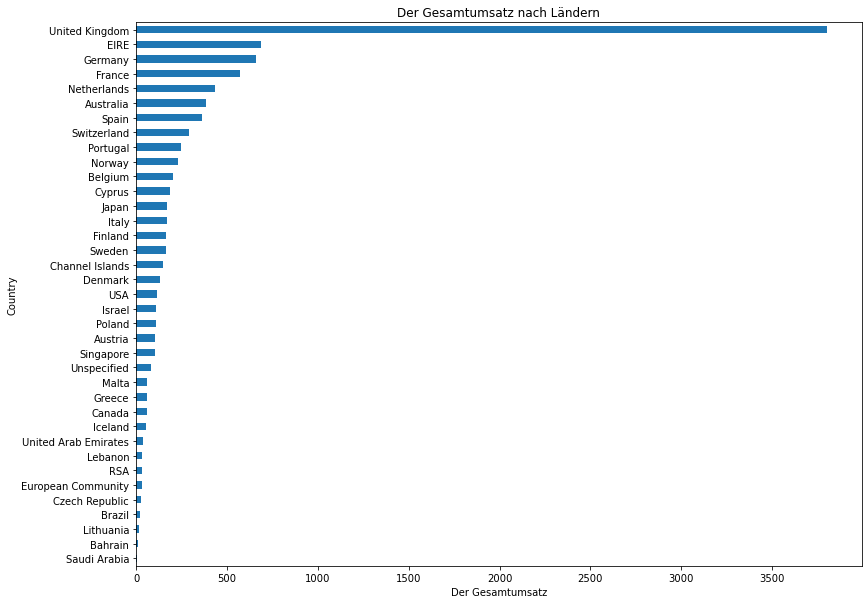

In [43]:
plt.figure(figsize=(13,10))
plt.title("Der Gesamtumsatz nach Ländern")
plt.xlabel("Der Gesamtumsatz")
df.groupby("Country")["total_preis"].nunique().sort_values().plot.barh()

UK hat nicht nur die meisten Umsätze, sondern auch die meisten Kunden. Da der Großteil dieses Datensatzes Bestellungen aus "UK" enthält, können wir den britischen Markt weiter erforschen, indem wir herausfinden, welche Produkte die Kunden gemeinsam kaufen und welches andere Kaufverhalten sie an den Tag legen, um unsere Vertriebs- und Zielgruppenstrategie zu verbessern.

### <font color='Red'>Erkunden den UK Markt</font>

In [44]:
df_uk = df[(df["Country"]=="United Kingdom") & (df["total_preis"]>0)].copy()

In [28]:
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [45]:
df_uk.reset_index(drop=True,inplace=True)

In [46]:
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


<font color='Red'>Was sind die beliebtesten Produkte, die in Großbritannien gekauft werden? </font>

In [47]:
df_uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
df_uk_product.head(5)

,StockCode,Description,Quantity
2514,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2016,23166,MEDIUM CERAMIC TOP STORAGE JAR,76919
2690,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182
3548,85099B,JUMBO BAG RED RETROSPOT,41981
3555,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34648


In [29]:
# print("Die beliebtesten Produkte, die in UK gekauft werden, sind :")
# print(df_uk.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head())

Die beliebtesten Produkte, die in UK gekauft werden, sind :
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS     49182
JUMBO BAG RED RETROSPOT               41981
WHITE HANGING HEART T-LIGHT HOLDER    34648
Name: Quantity, dtype: int64


##### Wir werden die Analyse der UK-Transaktionen mit der Kundensegmentierung fortsetzen.

## 2. RFM Analyse

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analyse** ist eine Kundensegmentierungstechnik zur Analyse des Kundenwerts auf Basis des vergangenen Kaufverhaltens. Die RFM-Analyse wurde erstmals vor mehr als vier Jahrzehnten von der Direktmailing-Industrie verwendet, ist aber immer noch eine effektive Methode zur Optimierung Ihres Marketings.
<br>
<br>

Wir beginnen mit der **RFM-Analyse** und ergänzen dann unsere Ergebnisse mit einer prädiktiven Analyse unter Verwendung von **K-Means Clustering-Algorithmen**.

- RECENCY (R): Datum seit dem letzten Kauf
- FREQUENCY (F): Gesamtzahl der Käufe
- MONETARY VALUE (M): Gesamtumsatz

### Importieren von Bibliotheken

In [48]:
from datetime import datetime, timedelta

### ii. Review df_uk DataFrame

In [49]:
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
...,...,...,...,...,...,...,...,...,...
354316,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.950,15804.000,United Kingdom,23.400
354317,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.950,13113.000,United Kingdom,23.600
354318,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.250,13113.000,United Kingdom,30.000
354319,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.950,13113.000,United Kingdom,214.800


### Recency

<span style="color:red">Wir wählen ein Datum als Bezugspunkt, um auszuwerten, vor wie vielen Tagen der letzte Einkauf des Kunden war. </span>

In [50]:
day_last_purchase = df_uk['InvoiceDate'].max()
ref_day = day_last_purchase + timedelta(days=1, minutes=1)

print(f'Last purchase on: {day_last_purchase}')
print(f'Reference day: {ref_day}')

Last purchase on: 2011-12-09 12:49:00
Reference day: 2011-12-10 12:50:00


<span style="color:red">Wir erstellen eine neue Spalte namens **"Date"**, die das InvoiceDate ohne Zeitstempel enthält </span>

In [51]:
df_uk['Date'] = df_uk['InvoiceDate'].dt.normalize()

https://deallen7.medium.com/managing-date-datetime-and-timestamp-in-python-pandas-cc9d285302ab

In [52]:
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01


<span style="color:red">Gruppierung nach CustomerID und Prüfung des letzten Kaufdatums </span>

In [53]:
df_uk["Recency"] = (ref_day - df_uk["Date"]).dt.days

In [54]:
recenc= df_uk.groupby("CustomerID")["Date"].min()
print(recenc.sort_values(ascending=False))

CustomerID
13436.000   2011-12-08
13298.000   2011-12-08
15520.000   2011-12-08
14569.000   2011-12-08
15195.000   2011-12-07
               ...    
17873.000   2010-12-01
16552.000   2010-12-01
17420.000   2010-12-01
17850.000   2010-12-01
13705.000   2010-12-01
Name: Date, Length: 3920, dtype: datetime64[ns]


<span style="color:red">Berechnung der Tage seit dem letzten Kauf </span>

In [55]:
recency = df_uk.groupby('CustomerID')['Recency'].min()
print(recency.sort_values(ascending =False))

CustomerID
17908.000    374
15922.000    374
16583.000    374
16048.000    374
17643.000    374
            ... 
16558.000      1
16954.000      1
13069.000      1
17389.000      1
16446.000      1
Name: Recency, Length: 3920, dtype: int64


<span style="color:red">Visualisierung RFM distributions</span>

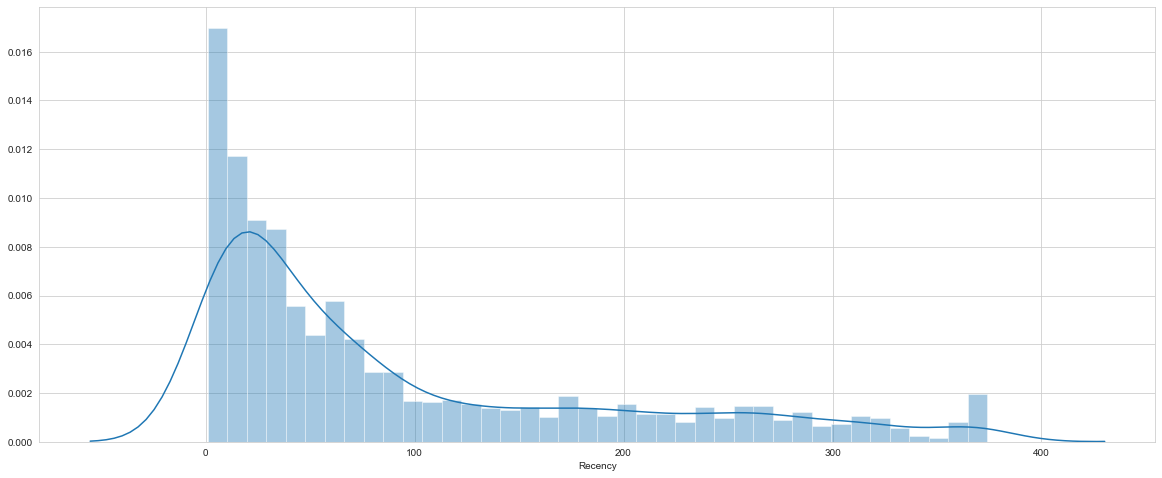

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.distplot(recency,bins=40)
plt.show()

In [61]:
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis,Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,2010-12-01,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,2010-12-01,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,374
...,...,...,...,...,...,...,...,...,...,...,...
354316,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.950,15804.000,United Kingdom,23.400,2011-12-09,1
354317,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.950,13113.000,United Kingdom,23.600,2011-12-09,1
354318,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.250,13113.000,United Kingdom,30.000,2011-12-09,1
354319,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.950,13113.000,United Kingdom,214.800,2011-12-09,1


### Frequency: Gesamtzahl der Käufe

Um zu berechnen, wie oft ein Kunde etwas gekauft hat, müssen wir zählen, wie viele Rechnungen jeder Kunde hat. 

<span style="color:red">Erstellung einer Kopie des DateFrames </span>

In [67]:
df_uk1 = df_uk.copy()

<span style="color:red">Löschung der doppelter Daten</span>

In [68]:
df_uk1.drop_duplicates(inplace=True)

<span style="color:red">Berechnung der Häufigkeit der Käufe </span>

In [69]:
frequency = df_uk1.groupby(['CustomerID'])["InvoiceNo"].nunique()

In [70]:
frequency.sort_values(ascending=False).head(5) 

CustomerID
12748.000    209
17841.000    124
13089.000     97
14606.000     93
15311.000     91
Name: InvoiceNo, dtype: int64

<span style="color:red">Visualisierung RFM distributions</span>

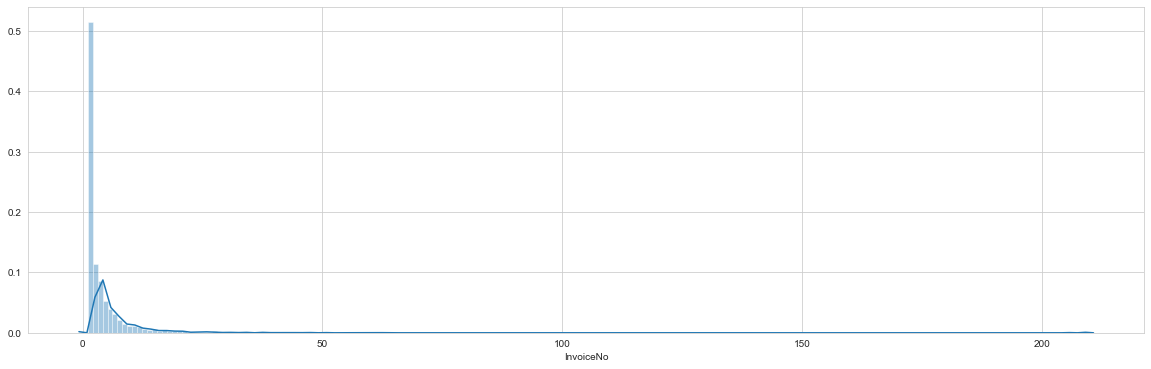

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
sns.distplot(frequency,bins=200)
plt.show()

### Monetary: Gesamtbetrag der ausgegebenen Gelder

Monatory wird berechnet, indem die Kosten für die Einkäufe der Kunden addiert werden.

 <span style="color:red">Berechnung der Summe der Gesamtkosten nach Kunden </span>

In [74]:
monetary = df_uk1.groupby('CustomerID').agg({"total_preis":'sum'})
monetary.head()

,total_preis
CustomerID,
12346.000,77183.600
12747.000,4196.010
12748.000,33053.190
12749.000,4090.880
12820.000,942.340


<span style="color:red">Visualisierung RFM distributions</span>

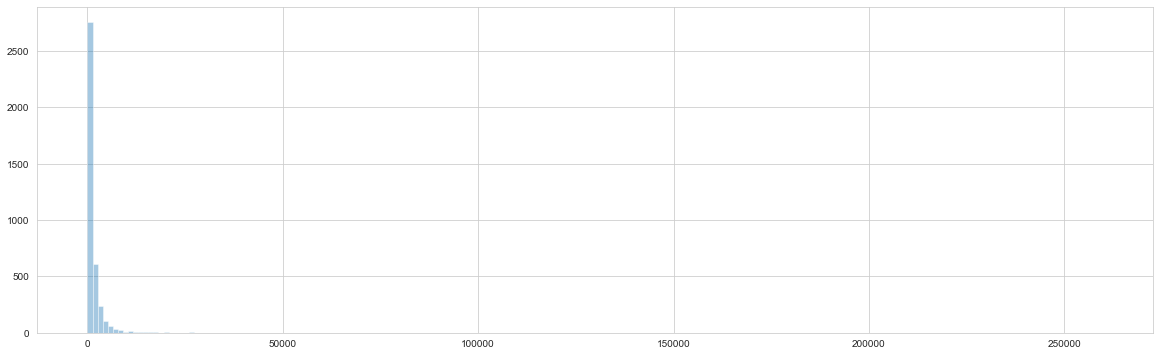

In [80]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
sns.distplot(monetary,bins=200, kde=False)
plt.show()

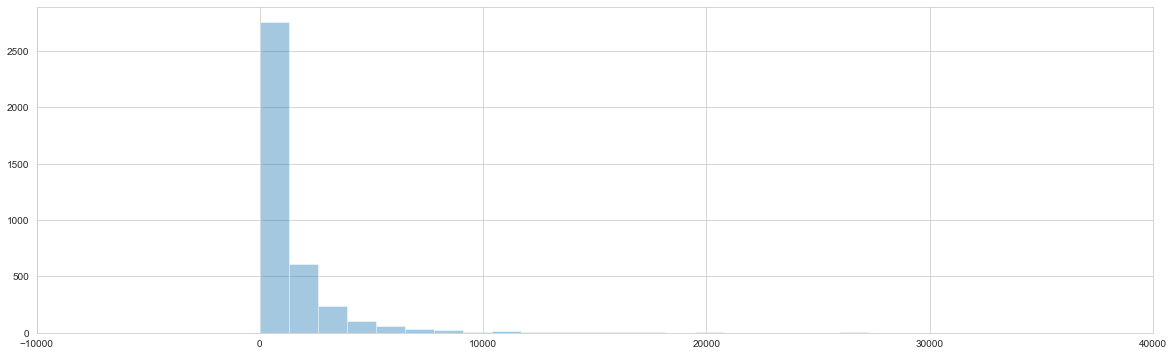

In [82]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
plt.xlim(-10000, 40000)
sns.distplot(monetary,bins=200, kde=False)
plt.show()

### Erstellung der RFM Tabelle
<span style="color:red">Merging der recency-, frequency- und Monetary Daten </span>

In [83]:
rfm = pd.merge(recency, frequency, on = "CustomerID").merge(monetary, on = "CustomerID")
rfm

,Recency,InvoiceNo,total_preis
CustomerID,,,
12346.000,326,1,77183.600
12747.000,3,11,4196.010
12748.000,1,209,33053.190
12749.000,4,5,4090.880
12820.000,4,4,942.340
...,...,...,...
18280.000,278,1,180.600
18281.000,181,1,80.820
18282.000,8,2,178.050


Wenn wir uns die CustomerID: 12346 ansehen, war sein letzter Kauf vor 326 Tagen (ab Referenzdatum), er hat nur einmal bei uns gekauft und insgesamt 77.183,60 $ ausgegeben

In [84]:
rfm.rename(columns={'InvoiceNo':'Frequency', 
                              'total_preis':'Monetary'}, inplace = True)

In [85]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.000,326,1,77183.600
12747.000,3,11,4196.010
12748.000,1,209,33053.190
12749.000,4,5,4090.880
12820.000,4,4,942.340


In [87]:
rfm.shape

(3920, 3)

## 3. Kundensegmentierung mit RFM-Scores

Unternehmen haben diesen immerwährenden Drang, ihre Kunden zu verstehen. Je besser Sie den Kunden verstehen, desto besser können Sie ihn bedienen und desto höher ist der finanzielle Gewinn, den Sie von diesem Kunden erhalten. Seit den Anfängen des Handels wird dieser Prozess des Verstehens von Kunden für einen strategischen Gewinn praktiziert und diese Aufgabe ist hauptsächlich als Kundensegmentierung bekannt. Wie der Name schon sagt, kann die Kundensegmentierung Kunden nach ihren genauen Bedürfnissen segmentieren. Einige der gebräuchlichen Methoden zur Segmentierung von Kunden basieren auf ihren Recency-Frequency-Monatory-Werten, ihren demografischen Merkmalen wie Geschlecht, Region, Land usw. und einigen ihrer geschäftsspezifischen Werte. In diesem Fall werden Sie Recency-Frequency-Monatory-Werte verwenden.(https://clevertap.com/blog/rfm-analysis/).

Wir werden eine RFM-Segmentierungstabelle erstellen, in der Sie Ihre Kunden anhand der RFM-Tabelle segmentieren. Zum Beispiel können Sie den besten Kunden als "Big Spenders" und den verlorenen Kunden als "Lost Customer" bezeichnen.

## Berechnung der RFM Score

Der einfachste Weg, Kundensegmente aus einem RFM-Modell zu erstellen, ist die Verwendung von **Quartilen**.

Jeder Kategorie (Recency, Frequency und Monetary) wird ein Wert von 1 bis 4 zugewiesen, wobei 4 der höchste/beste Wert ist. Der endgültige RFM-Score wird durch die Kombination aller RFM-Werte berechnet. 

<span style="color:red">Teilt "rfm" in Viertel -  Verteilung quartiles </span>

In [89]:
quantiles = rfm.quantile(q=[0.25, 0.50, 0.75])
quantiles

,Recency,Frequency,Monetary
0.250,18.000,1.000,298.185
0.500,51.000,2.000,644.975
0.750,143.000,5.000,1571.285


Wir werden in 4 Gruppen nach dem Interquartilbereich (IQR) gruppieren.

### Erstellung der RFM Segmentation Tabelle

Wir erstellen zwei Funktionen, eine für Recency und eine für Frequency und Monetary. Für Recency (Häufigkeit) sollten Kunden im ersten Quartal mit 4 bewertet werden, da dies den höchsten Recency-Wert darstellt. Umgekehrt sollten für Frequency und Monetary die Kunden im letzten Quartal mit 4 bewertet werden, was den höchsten Frequency- und Monetary-Werten entspricht.

In [90]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def R_Point(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [91]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def FM_Point(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

2. Wir bewerten Kunden von 1 bis 4, indem Sie die von Ihnen erstellten Funktionen anwenden. Erstellen Sie auch eine separate Bewertungsspalte für jeden Wert.

In [92]:
rfm['R_Quartile'] = rfm['Recency'].apply(R_Point, args=('Recency',quantiles))
rfm['F_Quartile'] = rfm['Frequency'].apply(FM_Point, args=('Frequency',quantiles))
rfm['M_Quartile'] = rfm['Monetary'].apply(FM_Point, args=('Monetary',quantiles))

3. Nachdem wir nun jeden Kunden bewertet haben, kombinieren wir die Werte für die Segmentierung.

In [95]:
rfm['RFM_Scores'] = rfm.R_Quartile.apply(str) + rfm.F_Quartile.apply(str) + rfm.M_Quartile.apply(str)
rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores
CustomerID,,,,,,,
12346.000,326,1,77183.600,1,1,4,114
12747.000,3,11,4196.010,4,4,4,444
12748.000,1,209,33053.190,4,4,4,444
12749.000,4,5,4090.880,4,3,4,434
12820.000,4,4,942.340,4,3,3,433
...,...,...,...,...,...,...,...
18280.000,278,1,180.600,1,1,1,111
18281.000,181,1,80.820,1,1,1,111
18282.000,8,2,178.050,4,2,1,421


4. Wir definieren die Funktion rfm_level, die Kunden mit Hilfe von RFM_Scrores markiert, und erstellen Sie eine neue Variable RFM_Level

### <span style="color:red"> METHOD-1 </span>

In [96]:
label = list(np.zeros(len(rfm)))

for i in range(len(rfm)):
    if rfm['RFM_Scores'].iloc[i] =='444': label[i] = "1-Best Customers"  
    elif rfm['RFM_Scores'].iloc[i][1]=='4': label[i] = "2-Loyal Customers"
    elif rfm['RFM_Scores'].iloc[i][2]=='4': label[i] = "3-Big Spenders"
    elif rfm['RFM_Scores'].iloc[i]=='244' : label[i] = "4-Almost Lost"
    elif rfm['RFM_Scores'].iloc[i]=='144' : label[i] = "5-Lost Customers"
    elif rfm['RFM_Scores'].iloc[i] =='111' : label[i] = "6-Lost Cheap Customers"       
        
rfm['RFM_Scores_Segments'] = label
rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments
CustomerID,,,,,,,,
12346.000,326,1,77183.600,1,1,4,114,3-Big Spenders
12747.000,3,11,4196.010,4,4,4,444,1-Best Customers
12748.000,1,209,33053.190,4,4,4,444,1-Best Customers
12749.000,4,5,4090.880,4,3,4,434,3-Big Spenders
12820.000,4,4,942.340,4,3,3,433,0.000
...,...,...,...,...,...,...,...,...
18280.000,278,1,180.600,1,1,1,111,6-Lost Cheap Customers
18281.000,181,1,80.820,1,1,1,111,6-Lost Cheap Customers
18282.000,8,2,178.050,4,2,1,421,0.000


In [98]:
rfm.RFM_Scores_Segments.value_counts()

0.0                       2420
1-Best Customers           423
6-Lost Cheap Customers     395
2-Loyal Customers          368
3-Big Spenders             314
Name: RFM_Scores_Segments, dtype: int64

In [99]:
Loyal_Customers=['433']
Big_Spenders=['413','432','423']
Almost_Lost=['333','233','422','331','313','431','323']
Lost_Customers=['222','311','322','223','332','411','133','132','312','131','123','213','113','421','412','231','321','232']
Lost_Cheap_Customers=['122','211','112','121','212','221']

In [100]:
for i in range(len(rfm)):
    if rfm['RFM_Scores'].iloc[i] in Loyal_Customers : label[i] = "2-Loyal Customers"
    elif rfm['RFM_Scores'].iloc[i] in Big_Spenders : label[i] = "3-Big Spenders"
    elif rfm['RFM_Scores'].iloc[i] in Almost_Lost : label[i] = "4-Almost Lost"
    elif rfm['RFM_Scores'].iloc[i] in Lost_Customers : label[i] = "5-Lost Customers"
    elif rfm['RFM_Scores'].iloc[i] in Lost_Cheap_Customers  : label[i] = "6-Lost Cheap Customers"       
        
rfm['RFM_Scores_Segments'] = label
rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments
CustomerID,,,,,,,,
12346.000,326,1,77183.600,1,1,4,114,3-Big Spenders
12747.000,3,11,4196.010,4,4,4,444,1-Best Customers
12748.000,1,209,33053.190,4,4,4,444,1-Best Customers
12749.000,4,5,4090.880,4,3,4,434,3-Big Spenders
12820.000,4,4,942.340,4,3,3,433,2-Loyal Customers
...,...,...,...,...,...,...,...,...
18280.000,278,1,180.600,1,1,1,111,6-Lost Cheap Customers
18281.000,181,1,80.820,1,1,1,111,6-Lost Cheap Customers
18282.000,8,2,178.050,4,2,1,421,5-Lost Customers


In [102]:
rfm.RFM_Scores_Segments.value_counts().sort_index()

1-Best Customers           423
2-Loyal Customers          527
3-Big Spenders             401
4-Almost Lost              490
5-Lost Customers           963
6-Lost Cheap Customers    1116
Name: RFM_Scores_Segments, dtype: int64

In [103]:
rfm.groupby('RFM_Scores_Segments').agg({'Recency': ['mean','median','min','max'],
                                           'Frequency': ['mean','median','min','max'],
                                           'Monetary': ['mean','median','min','max','count']}).round(1)

Recency                 Frequency                 Monetary                                   
                          mean median min  max      mean median min  max     mean   median      min        max count
RFM_Scores_Segments                                                                                                 
1-Best Customers         7.700      6   1   18    15.800     11   6  209 8424.300 3989.600 1591.500 259657.300   423
2-Loyal Customers       36.900     23   1  373     7.300      6   3   63 2557.400 1476.100   70.000  80850.800   527
3-Big Spenders          49.000     29   1  373     3.500      4   1    5 2858.700 1910.000  342.200 168472.500   401
4-Almost Lost           44.400     34   2  143     3.100      3   1    5  913.500  890.700   36.600   1567.500   490
5-Lost Customers        78.600     48   2  372     1.900      2   1    5  503.000  440.000    6.900   1564.600   963
6-Lost Cheap Customers 200.600    202  52  374     1.200      1   1    2  264.800  241.000    3.800    642.400  1116

### <span style="color:red"> METHOD-2 </span>

In [104]:
rfm['RFM_Points'] = rfm[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1).astype('float')
# rfm['RFM_Points'] = rfm['R_Quartile'] + rfm['F_Quartile'] + rfm['M_Quartile']
rfm.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points
CustomerID,,,,,,,,,
12346.000,326,1,77183.600,1,1,4,114,3-Big Spenders,6.000
12747.000,3,11,4196.010,4,4,4,444,1-Best Customers,12.000
12748.000,1,209,33053.190,4,4,4,444,1-Best Customers,12.000
12749.000,4,5,4090.880,4,3,4,434,3-Big Spenders,11.000
12820.000,4,4,942.340,4,3,3,433,2-Loyal Customers,10.000


In [106]:
label = list(np.zeros(len(rfm)))

for i in range(len(rfm)):
    if rfm['RFM_Points'].iloc[i] ==12: label[i] = "1-Best Customers"  
    elif rfm['RFM_Points'].iloc[i] ==11: label[i] = "2-Loyal Customers"
    elif rfm['RFM_Points'].iloc[i] >= 9 : label[i] = "3-Big Spenders"
    elif rfm['RFM_Points'].iloc[i] >= 7 : label[i] = "4-Almost Lost"
    elif rfm['RFM_Points'].iloc[i] >= 5 : label[i] = "5-Lost Customers"
    else : label[i] = "6-Lost Cheap Customers"       
        
rfm['RFM_Points_Segments'] = label
rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments
CustomerID,,,,,,,,,,
12346.000,326,1,77183.600,1,1,4,114,3-Big Spenders,6.000,5-Lost Customers
12747.000,3,11,4196.010,4,4,4,444,1-Best Customers,12.000,1-Best Customers
12748.000,1,209,33053.190,4,4,4,444,1-Best Customers,12.000,1-Best Customers
12749.000,4,5,4090.880,4,3,4,434,3-Big Spenders,11.000,2-Loyal Customers
12820.000,4,4,942.340,4,3,3,433,2-Loyal Customers,10.000,3-Big Spenders
...,...,...,...,...,...,...,...,...,...,...
18280.000,278,1,180.600,1,1,1,111,6-Lost Cheap Customers,3.000,6-Lost Cheap Customers
18281.000,181,1,80.820,1,1,1,111,6-Lost Cheap Customers,3.000,6-Lost Cheap Customers
18282.000,8,2,178.050,4,2,1,421,5-Lost Customers,7.000,4-Almost Lost


In [107]:
rfm.groupby('RFM_Points').agg({'Recency': ['mean','median','min','max'],
                                 'Frequency': ['mean','median','min','max'],
                                 'Monetary': ['mean','median','min','max','count']}).round(1)

Recency                   Frequency                 Monetary                                   
              mean  median  min  max      mean median min  max     mean   median      min        max count
RFM_Points                                                                                                
3.000      266.200 265.000  144  374     1.000      1   1    1  157.300  153.900    3.800    298.100   395
4.000      184.900 179.500   52  374     1.100      1   1    2  279.500  284.500    6.200    642.000   454
5.000      110.600  78.000   19  372     1.300      1   1    4  362.800  322.400   20.800   1384.200   448
6.000       88.900  59.000    2  373     1.700      2   1    6  701.100  428.400    6.900  77183.600   406
7.000       76.600  60.000    2  359     2.300      2   1    6  693.400  592.900   36.600   4314.700   370
8.000       59.000  47.000    2  334     3.000      3   1    7 1123.400  757.100  102.400  44534.300   367
9.000       45.900  32.000    1  373     4.000      4   1   34 1390.100 1099.300  201.100   7832.500   408
10.000      30.000  22.000    1  135     5.200      5   2   39 2320.700 1418.000  306.700 168472.500   349
11.000      21.000  20.000    1   51     8.000      7   3   63 3464.600 2369.800  801.100  80850.800   300
12.000       7.700   6.000    1   18    15.800     11   6  209 8424.300 3989.600 1591.500 259657.300   423

<span style="color:red">Berechnet Durchschnittswerte für jeden RFM_Punkt und gibt die Größe jedes Segments zurück </span>

In [108]:
avg_RFM_Points = rfm.groupby('RFM_Points_Segments').RFM_Points.mean().apply(lambda x:round(x,1))
size_RFM_Points = rfm['RFM_Points_Segments'].value_counts()
summary= pd.concat([avg_RFM_Points, size_RFM_Points], axis=1).rename(columns={"RFM_Points": "avg_RFM_Points", 
                                                                   "RFM_Points_Segments": "size_RFM_Points"}).sort_values('avg_RFM_Points',
                                                                                                           ascending=False)
summary

,avg_RFM_Points,size_RFM_Points
1-Best Customers,12.000,423
2-Loyal Customers,11.000,300
3-Big Spenders,9.500,757
4-Almost Lost,7.500,737
5-Lost Customers,5.500,854
6-Lost Cheap Customers,3.500,849


In [109]:
rfm.groupby('RFM_Points_Segments').agg({'Recency': ['mean','median','min','max'],
                                           'Frequency': ['mean','median','min','max'],
                                           'Monetary': ['mean','median','min','max'],
                                           'RFM_Points': ['mean','median','min','max','count']}).round(1)

Recency                 Frequency                 Monetary                              RFM_Points                           
                          mean median min  max      mean median min  max     mean   median      min        max       mean median    min    max count
RFM_Points_Segments                                                                                                                                 
1-Best Customers         7.700      6   1   18    15.800     11   6  209 8424.300 3989.600 1591.500 259657.300     12.000 12.000 12.000 12.000   423
2-Loyal Customers       21.000     20   1   51     8.000      7   3   63 3464.600 2369.800  801.100  80850.800     11.000 11.000 11.000 11.000   300
3-Big Spenders          38.600     27   1  373     4.500      4   1   39 1819.100 1245.900  201.100 168472.500      9.500  9.000  9.000 10.000   757
4-Almost Lost           67.900     52   2  359     2.600      2   1    7  907.500  664.500   36.600  44534.300      7.500  7.000  7.000  8.000   737
5-Lost Customers       100.300     71   2  373     1.500      1   1    6  523.700  363.700    6.900  77183.600      5.500  5.000  5.000  6.000   854
6-Lost Cheap Customers 222.700    234  52  374     1.100      1   1    2  222.700  197.900    3.800    642.000      3.500  4.000  3.000  4.000   849

In [111]:
rfm.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments
CustomerID,,,,,,,,,,
12346.000,326,1,77183.600,1,1,4,114,3-Big Spenders,6.000,5-Lost Customers
12747.000,3,11,4196.010,4,4,4,444,1-Best Customers,12.000,1-Best Customers
12748.000,1,209,33053.190,4,4,4,444,1-Best Customers,12.000,1-Best Customers
12749.000,4,5,4090.880,4,3,4,434,3-Big Spenders,11.000,2-Loyal Customers
12820.000,4,4,942.340,4,3,3,433,2-Loyal Customers,10.000,3-Big Spenders


 ### <span style="color:red">**Comparison of the Two Methods**</span>

In [113]:
pd.crosstab(rfm['RFM_Scores_Segments'], rfm['RFM_Points_Segments'])

RFM_Points_Segments,1-Best Customers,2-Loyal Customers,3-Big Spenders,4-Almost Lost,5-Lost Customers,6-Lost Cheap Customers
RFM_Scores_Segments,,,,,,
1-Best Customers,423,0,0,0,0,0
2-Loyal Customers,0,217,302,7,1,0
3-Big Spenders,0,83,265,47,6,0
4-Almost Lost,0,0,190,300,0,0
5-Lost Customers,0,0,0,383,580,0
6-Lost Cheap Customers,0,0,0,0,267,849


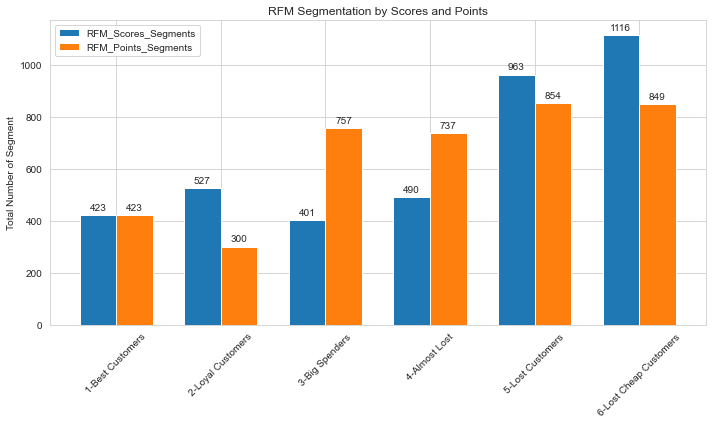

In [114]:
labels = list(rfm.RFM_Scores_Segments.value_counts().sort_index().index)
RFM_Scores_Segments = list(rfm.RFM_Scores_Segments.value_counts().sort_index().values)
RFM_Points_Segments = list(rfm.RFM_Points_Segments.value_counts().sort_index().values)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, RFM_Scores_Segments, width, label='RFM_Scores_Segments')
rects2 = ax.bar(x + width/2, RFM_Points_Segments, width, label='RFM_Points_Segments')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Number of Segment')
ax.set_title('RFM Segmentation by Scores and Points')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

**Erläuterung:**
* Man kann sagen: Die Verteilung des Clustering auf Basis von RFM_Punkten ist erfolgreicher. Sie ist näher an der Normalverteilung, auch wenn sie linksschief ist.
* Wir fahren mit der Visualisierung der Verteilung des Clustering basierend auf RFM_Points fort.

## Plot RFM Segments

<span style="color:red">1. Wir erstellen den Plot und ändern seine Größe. </span>

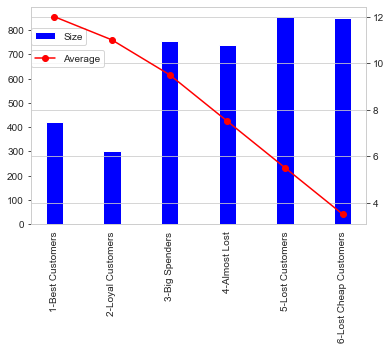

In [116]:
fig, ax = plt.subplots()
summary.size_RFM_Points.plot(ax=ax,color='b',label='Size',kind='bar',width=0.3)
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
summary.avg_RFM_Points.plot(ax=ax2,color='r',label='Average', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
ax.grid()

In [117]:
# # Alternative
# fig, ax = plt.subplots()
# ax=sns.barplot(x=summary.index, y=summary.size_RFM_Points)

# ax2 = ax.twinx()
# ax2=sns.lineplot(x=summary.index, y=summary.avg_RFM_Points)

Anhand der hier gefundenen Kundensegmentierungskategorien (http://www.blastam.com/blog/rfm-analysis-boosts-sales) können wir für jeden Kundentyp unterschiedliche Marketingstrategien und Ansätze zur Kundenansprache formulieren.

Hinweis: Der Autor im Artikel bewertet 1 als den höchsten und 4 als den niedrigsten

<span style="color:red">2. Wie viele Kunden haben wir in jedem Segment? </span>

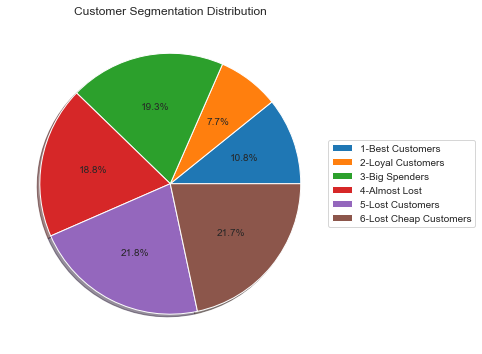

In [118]:
plt.figure(figsize=(6,6))

# explode = [0.01,0.01,0.1]
plt.pie(rfm['RFM_Points_Segments'].value_counts().sort_index(),autopct='%1.1f%%',shadow=True,startangle=0)
plt.legend(rfm['RFM_Points_Segments'].value_counts().sort_index().index,bbox_to_anchor=(1.45,0.5),loc='center right')
plt.title('Customer Segmentation Distribution')
plt.axis('off')
plt.show()

<Figure size 1080x1080 with 0 Axes>

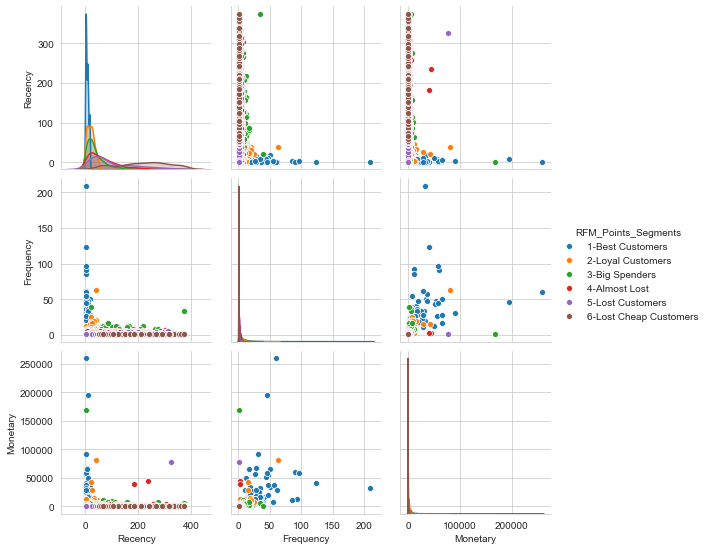

In [119]:
plt.figure(figsize=(15,15))
rfm = rfm.sort_values('RFM_Points_Segments')
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary','RFM_Points_Segments']],hue='RFM_Points_Segments')

**Erläuterung:**
* Es gibt kein so klares, aussagekräftiges Muster in diesem Diagramm. Es muss skaliert werden.

<Figure size 1440x1440 with 0 Axes>

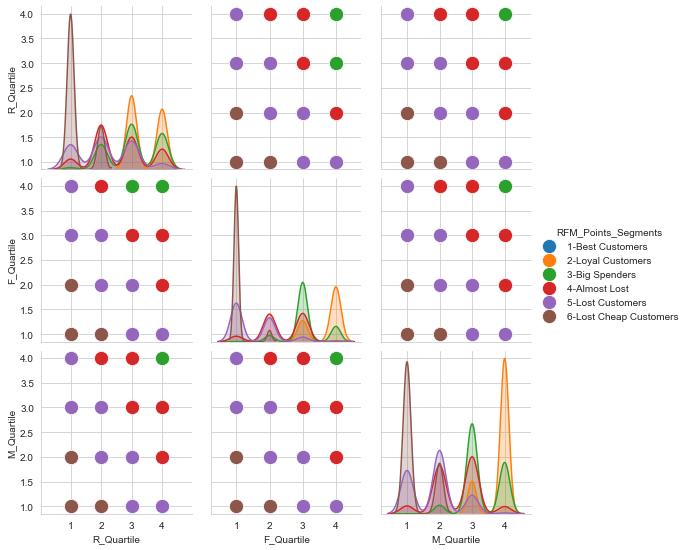

In [120]:
plt.figure(figsize=(20,20))
# rfm=df_rfm.sort_values('RFM_Points_Segments')
sns.pairplot(rfm[['R_Quartile', 'F_Quartile', 'M_Quartile','RFM_Points_Segments']],
             hue='RFM_Points_Segments',plot_kws={"s": 200})

**Erläuterung:**
* "1-Best Customers" >> {444}
* "2-Loyal Customers"
* "3-Big Spenders"
* "4-Almost Lost"
* "5-Lost Customers"
* "6-Lost Cheap Customers" >> {111}

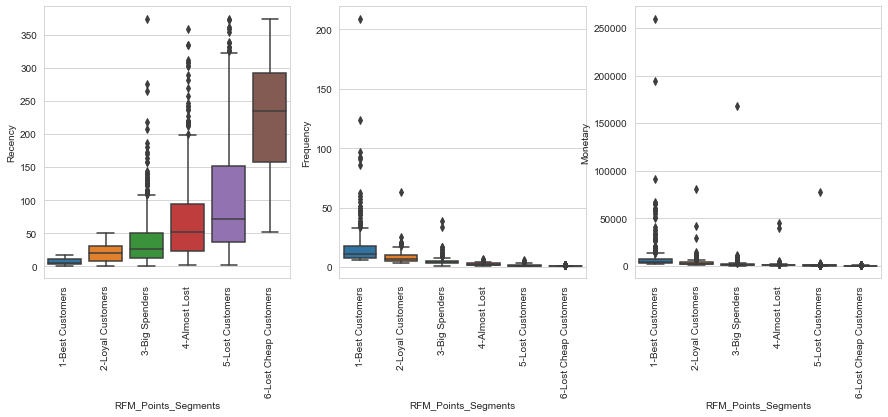

In [123]:
plt.figure(figsize=(15,5))
# rfm=rfm.sort_values('RFM_Points_Segments')

plt.subplot(1,3,1)
sns.boxplot(rfm['RFM_Points_Segments'], rfm['Recency'])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(rfm['RFM_Points_Segments'], rfm['Frequency'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(rfm['RFM_Points_Segments'], rfm['Monetary'])
plt.xticks(rotation=90)
plt.show()

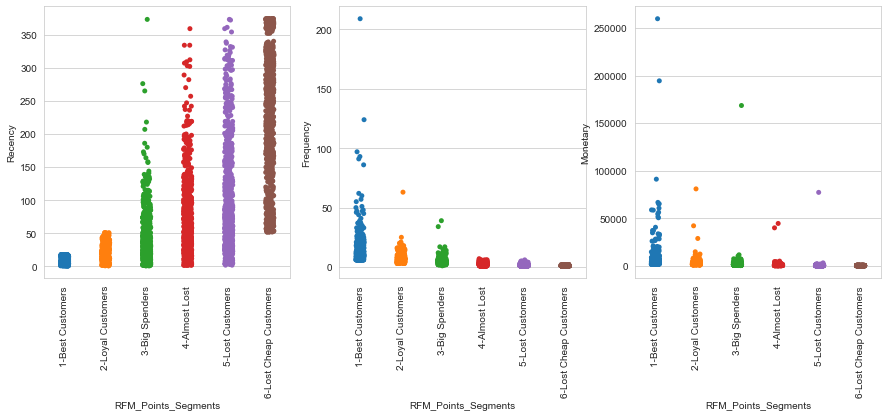

In [124]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.stripplot(rfm['RFM_Points_Segments'], rfm['Recency'])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.stripplot(rfm['RFM_Points_Segments'], rfm['Frequency'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.stripplot(rfm['RFM_Points_Segments'], rfm['Monetary'])
plt.xticks(rotation=90)
plt.show()

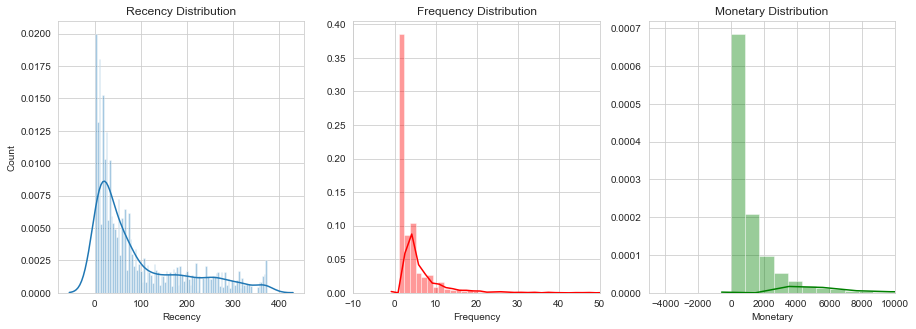

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(rfm.Recency,bins=100)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(rfm['Frequency'],color='red',bins=150)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('')
plt.xlim(-10, 50)

plt.subplot(1,3,3)
sns.distplot(rfm['Monetary'],color='green',bins=300)
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('')
plt.xlim(-5000, 10000)
plt.show()

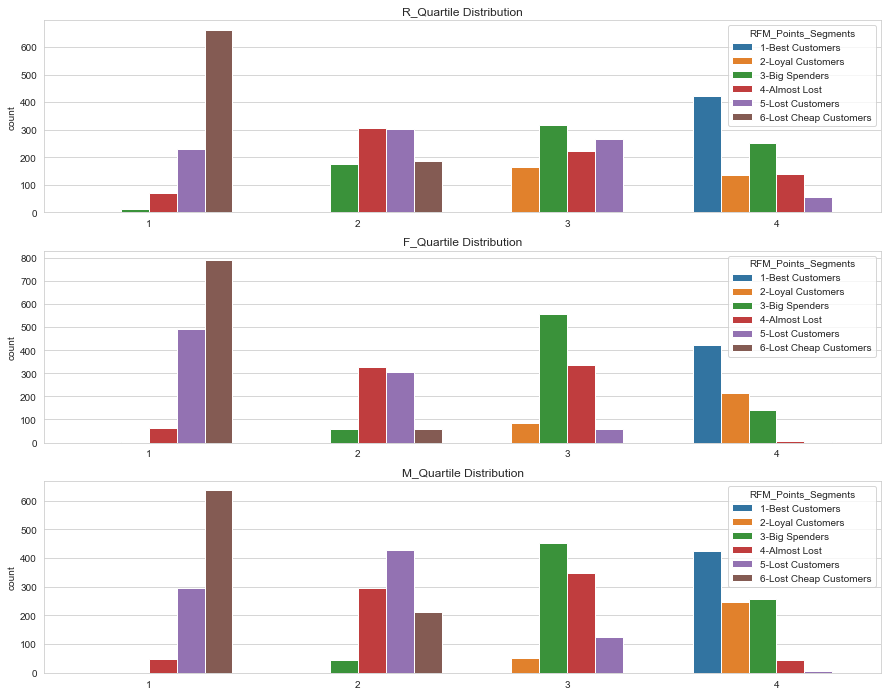

In [128]:
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
plt.title('R_Quartile Distribution')
sns.countplot(x='R_Quartile', hue='RFM_Points_Segments', data=rfm)
plt.xlabel('')

plt.subplot(3,1,2)
plt.title('F_Quartile Distribution')
sns.countplot(x='F_Quartile',  hue='RFM_Points_Segments', data=rfm)
plt.xlabel('')

plt.subplot(3,1,3)
plt.title('M_Quartile Distribution')
sns.countplot(x='M_Quartile',  hue='RFM_Points_Segments', data=rfm)
plt.xlabel('')
plt.show()

In [129]:
rfm.RFM_Points_Segments.value_counts().sort_index()

1-Best Customers          423
2-Loyal Customers         300
3-Big Spenders            757
4-Almost Lost             737
5-Lost Customers          854
6-Lost Cheap Customers    849
Name: RFM_Points_Segments, dtype: int64

# 4. Anwendung der K-Means Clustering

Jetzt, da wir unsere Kunden in 6 verschiedene Kategorien segmentiert haben, können wir weitere Erkenntnisse über das Kundenverhalten gewinnen, indem wir prädiktive Modelle in Verbindung mit unserem RFM-Modell verwenden.

Mögliche Algorithmen sind **Logistische Regression**, **K-Means Clustering** und **K-nearest Neighbor**. Wir werden uns für [K-Means] (https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) entscheiden, da wir bereits unsere eindeutigen Gruppen festgelegt haben. K-Means wurde auch häufig für die Marktsegmentierung verwendet und hat den Vorteil, dass es einfach zu implementieren ist.

### Vorverarbeitung und Untersuchung von Daten

In [132]:
df_uk1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis,Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,2010-12-01,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,2010-12-01,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,374


In [135]:
df_uk2 = pd.merge(df_uk1, rfm, on = "CustomerID")

In [139]:
df_uk2['InvoicePeriod']=pd.to_datetime(df_uk2['InvoiceDate']).apply(lambda x: x.to_period('M'))
df_line=pd.DataFrame(df_uk2.groupby('InvoicePeriod').CustomerID.nunique())
df_line['TotalPrice']=df_uk2.groupby('InvoicePeriod').Monetary.sum()

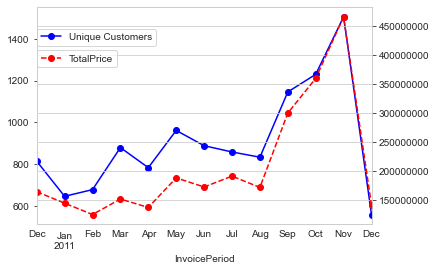

In [140]:
fig, ax = plt.subplots()
df_line.CustomerID.plot(ax=ax,color='b',label='Unique Customers', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
df_line.TotalPrice.plot(ax=ax2,color='r',label='TotalPrice',linestyle='--', marker='o')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False) # remove scientific notation
ax.grid()

** Erklärung: **
* Es wird beobachtet, dass die Kundendichte und damit der Gesamtumsatz für jeden Monat unterschiedlich sind. In diesem Fall können wir sagen, dass die "lifespan" eines Kunden im System ein Parameter ist, den wir berücksichtigen sollten.

In [141]:
life_span=pd.DataFrame(df.groupby('CustomerID').InvoiceDate.apply(lambda x:max(x).date() - min(x).date()))
life_span=life_span.agg({'InvoiceDate':lambda x:x.astype('timedelta64[D]')}).rename(columns= {'InvoiceDate':'life_span'})

In [142]:
df_kmeans=rfm[['Recency', 'Frequency', 'Monetary']]
df_kmeans['life_span']=life_span
df_kmeans

,Recency,Frequency,Monetary,life_span
CustomerID,,,,
16670.000,17,11,4095.900,342.000
17705.000,4,9,1823.520,298.000
17706.000,5,17,10504.490,362.000
17086.000,8,6,2050.080,56.000
13319.000,6,26,10845.550,362.000
...,...,...,...,...
17278.000,242,1,246.040,0.000
17279.000,58,1,187.830,0.000
13747.000,374,1,79.600,0.000


<span style="color:red">wir erstellen Heatmap und die Ergebnisse auswerten </span>

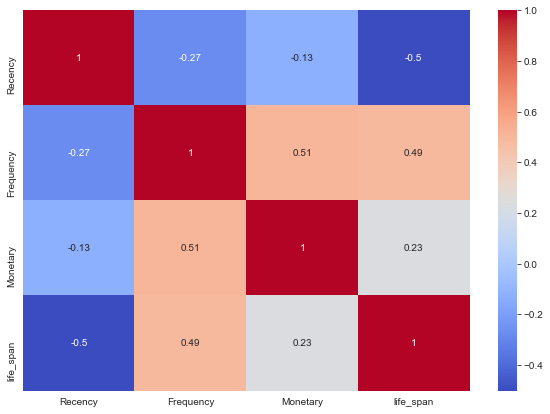

In [143]:
plt.figure(figsize=(10,7))
sns.heatmap(df_kmeans.corr(),annot=True, cmap="coolwarm");

### Normalisierung der Daten

<span style="color:red">Wir verwenden die Logarithmusmethode, um die Werte in einer Spalte zu normalisieren. </span>

In [144]:
def col_plot(df,col_name,iqr=1.5):
    plt.figure(figsize=(15,5))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name], whis = iqr)
    plt.xlabel(f"IQR={iqr}")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = iqr)
    plt.xlabel(f"ROOT SQUARE - IQR={iqr}")

    plt.subplot(144)
    plt.boxplot(np.log(df[col_name]+1), whis = iqr)
    plt.xlabel(f"LOGARITMIC - IQR={iqr}")
    plt.show()

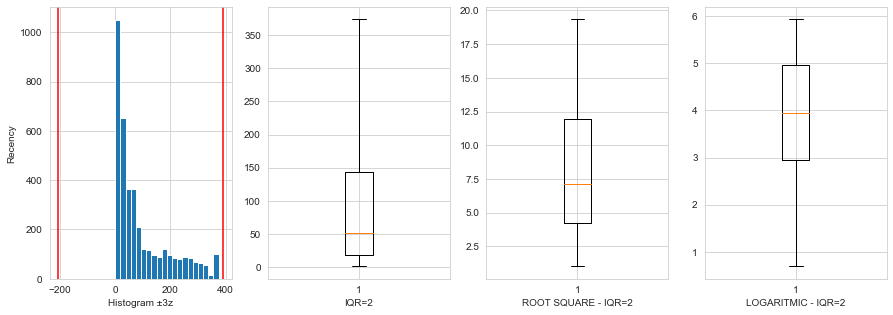

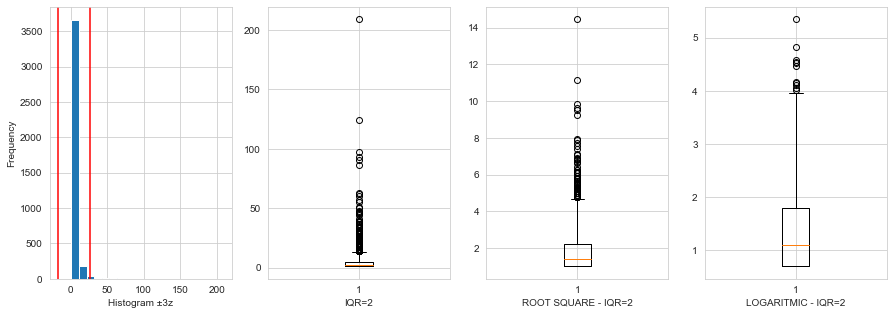

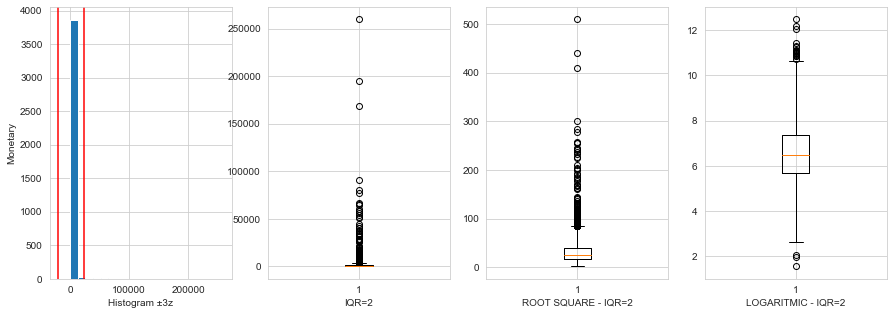

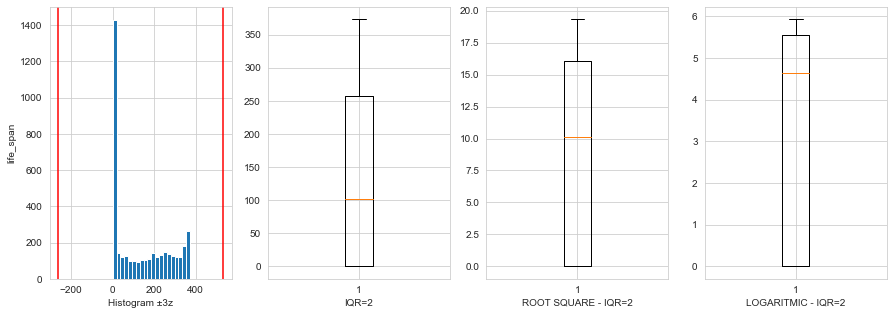

In [145]:
for i in df_kmeans:
    col_plot(df_kmeans,i,2)

In [146]:
features=[
#           'Recency', 
          'Frequency', 
          'Monetary', 
#           'life_span',
         ]

In [147]:
df_log=df_kmeans.copy()
for i in features:
    df_log[i]=np.log(df_log[i]+1)

In [148]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

#### **Outlier Detection**

In [149]:
iqr=2
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_log, col)[2] > 0:
        outliers=detect_outliers(df_log, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Logarithmed

11 outliers in 'Frequency'
20 outliers in 'Monetary'

31 OUTLIERS TOTALLY


**Drop Outliers**

In [150]:
df_log.shape

(3920, 4)

In [151]:
iqr=2
for i in ['Frequency','Monetary']:
    lower,upper,_=detect_outliers(df_log,i,iqr)
    df_log=df_log[(df_log[i]>lower)&(df_log[i]<upper)]

In [152]:
df_log.shape

(3893, 4)

**Erläuterung**
* Wenn Sie binäre Werte, diskrete Attribute oder kategoriale Attribute haben, halten Sie sich von k-means fern. K-means muss Mittelwerte berechnen, und der Mittelwert ist bei dieser Art von Daten nicht aussagekräftig.

**Skalierung:**
* Wenn Sie Attribute mit einer klar definierten Bedeutung haben. Wenn Sie Attribute mit einer klar definierten Bedeutung haben, z. B. Breitengrad und Längengrad, sollten Sie Ihre Daten nicht skalieren, da dies zu Verzerrungen führt.

* Wenn Sie gemischte numerische Daten haben, bei denen jedes Attribut etwas völlig anderes ist (z. B. Schuhgröße und Gewicht) und mit unterschiedlichen Einheiten versehen ist (lb, tons, m, kg ...), dann sind diese Werte ohnehin nicht wirklich vergleichbar; eine Skalierung ist eine bewährte Methode, um ihnen gleiches Gewicht zu verleihen.

In [153]:
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(StandardScaler().fit_transform(df_log),
                         columns=df_kmeans.columns,index=df_log.index)
df_scaled.head()

,Recency,Frequency,Monetary,life_span
CustomerID,,,,
16670.000,-0.765,1.760,1.510,1.571
17705.000,-0.896,1.482,0.831,1.239
17706.000,-0.886,2.380,2.299,1.722
17086.000,-0.855,0.937,0.929,-0.589
13319.000,-0.875,2.999,2.326,1.722


 <span style="color:red">Wir plotten normalisierte Daten mit Streumatrix oder Pairplot. Werten Sie die Ergebnisse auch aus.</span>

<Figure size 1080x1080 with 0 Axes>

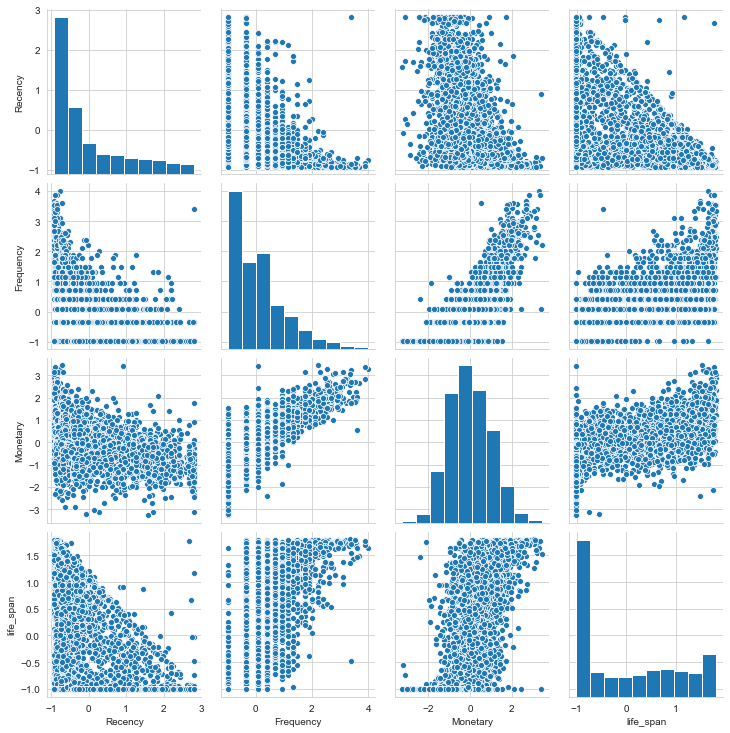

In [154]:
plt.figure(figsize=(15,15))
sns.pairplot(df_scaled[['Recency', 'Frequency', 'Monetary','life_span']]);

## K-Means-Implementierung

Bei k-means müssen Sie k auf die gewünschte Anzahl von Clustern einstellen, aber herauszufinden, wie viele Cluster das sind, ist nicht von Anfang an klar. Wir werden verschiedene Clusterzahlen ausprobieren und deren [Silhouettenkoeffizient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) überprüfen. Der Silhouettenkoeffizient für einen Datenpunkt misst, wie ähnlich er seinem zugeordneten Cluster ist, von -1 (unähnlich) bis 1 (ähnlich). 
<br>
<br>
**Hinweis**: K-means ist empfindlich gegenüber Initialisierungen, da diese entscheidend für die Qualität der gefundenen Optima sind. Daher werden wir eine intelligente Initialisierung verwenden, die "Elbow-Methode".

### Definierung der optimale Anzahl von Clustern

In [156]:
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score

[Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

[Hopkins Test](https://en.wikipedia.org/wiki/Hopkins_statistic)
* Basierend auf Nullhypothese (Ho) und Alternativhypothese (Ha).
* Nullhypothese (Ho): Es gibt eine gleichmäßige Verteilung, keine signifikante Clusterbildung.
* Alternativhypothese (Ha): Daten bestehen aus zufälligen Datenpunkten. Es gibt also Sandstrahlen.
* Es gibt eine Punktzahl im Bereich von [0,1]. Wenn sich die Punktzahl 0 nähert, sind die Daten nicht einheitlich, sodass sie zu Clusterbildung neigen.
* Wenn es sich 1 nähert, gibt es eine einheitliche Struktur, die als Clusterbildung vor 0,5 ausgedrückt wird. In der Praxis werden 0,3 Nerven genommen.

In [157]:
hopkins(df_scaled,df_scaled.shape[0])

0.09304470169317394

**Auswertungen:**
* Laut Hopkins Score können wir sagen, dass unser Datenrahmen für Clustering sehr geeignet ist. 

[Die Elbow-Methode] (https://en.wikipedia.org/wiki/Elbow_method_ (Clustering)
* Eine Methode, die eine Lösung entwickelt, die auf der Beziehung zwischen der erklärten Varianz (Summe der quadratischen Abstände) und der Anzahl der Cluster (k) basiert.
* dh die erläuterte Varianz wird als Funktion der Anzahl der Sätze aufgetragen, wobei der Punkt, an dem der Ellbogen in der Grafik bricht, der optimale Wert von k ist.
* Wir werden uns auf den optimalen Punkt stützen, an dem der minimale Fehler mit dem minimalen k genommen wird. Wir werden dahin gehen, wo das scharfe Denken endet.

In [159]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df_scaled))
    ssd.append(kmeans.inertia_)

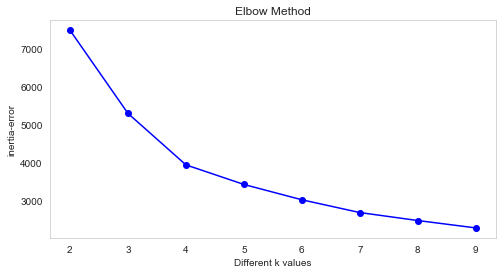

In [160]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

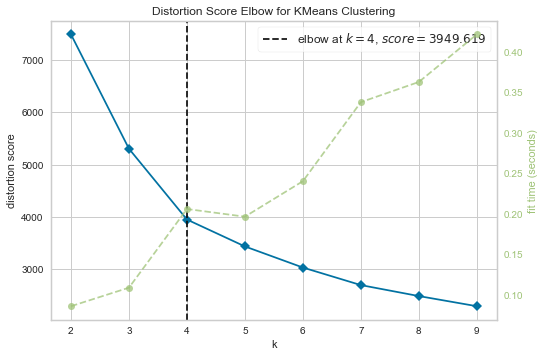

In [161]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_scaled)
visu.show();

 <span style="color:red">Wie aus der Silhoutte-Score- und der Elbow-Methode-Analyse hervorgeht, ist die beste Clusterzahl für die Kundensegmentierung 4</span>

[Silhouette Coefficient] (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
* basiert auf zwei Abständen für jede Daten. Die erste dieser Entfernungen ist der Durchschnitt der Entfernungen zu anderen Daten, die zu dem Cluster gehören, in dem sich die Daten befinden.
* Der zweite ist der Durchschnitt der Entfernungen zu allen Daten des benachbarten Clusters, die den Daten am nächsten liegen.
* Durch den S-Wert ausgedrückt, wenn s nahe bei 1 liegt, ist es tendenziell ein hohes Clustering, und wenn es nahe bei -1 liegt, ist es tendenziell ein niedriges Clustering.

In [162]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.43396560504890175
Silhouette Score for 3 clusters: 0.3836915576466329
Silhouette Score for 4 clusters: 0.36473142723918467
Silhouette Score for 5 clusters: 0.3282088152861494
Silhouette Score for 6 clusters: 0.3279792948610017
Silhouette Score for 7 clusters: 0.32909774818447707
Silhouette Score for 8 clusters: 0.29775583458619487
Silhouette Score for 9 clusters: 0.2898251779912454


### Model Fitting

wir passen den K-Means-Algorithmus an die optimale Anzahl von Clustern an, die wir ausgewählt haben, und speichern wir das Modell auf der Festplatte.

In [164]:
kmeans = KMeans(n_clusters = 4).fit(df_scaled)
labels = kmeans.labels_
df_scaled['Kmeans_Label_ID']=labels

In [165]:
keys=df_scaled.groupby('Kmeans_Label_ID').Frequency.mean().sort_values().index
values=['Bronze','Silver','Gold','Diamond']
dictionary = dict(zip(keys, values))

df_scaled['Kmeans_Label']=df_scaled.Kmeans_Label_ID.apply(lambda x:dictionary[x] )
df_scaled

,Recency,Frequency,Monetary,life_span,Kmeans_Label_ID,Kmeans_Label
CustomerID,,,,,,
16670.000,-0.765,1.760,1.510,1.571,1,Diamond
17705.000,-0.896,1.482,0.831,1.239,1,Diamond
17706.000,-0.886,2.380,2.299,1.722,1,Diamond
17086.000,-0.855,0.937,0.929,-0.589,3,Gold
13319.000,-0.875,2.999,2.326,1.722,1,Diamond
...,...,...,...,...,...,...
17278.000,1.497,-0.977,-0.845,-1.011,2,Bronze
17279.000,-0.353,-0.977,-1.071,-1.011,0,Silver
13747.000,2.823,-0.977,-1.784,-1.011,2,Bronze


### Visualisierung der Clusters

wir erstellen ein Streudiagramm und wählen Clusterzentren aus

In [166]:
df_scaled.Kmeans_Label.value_counts().sort_index()

Bronze      825
Diamond     688
Gold       1283
Silver     1097
Name: Kmeans_Label, dtype: int64

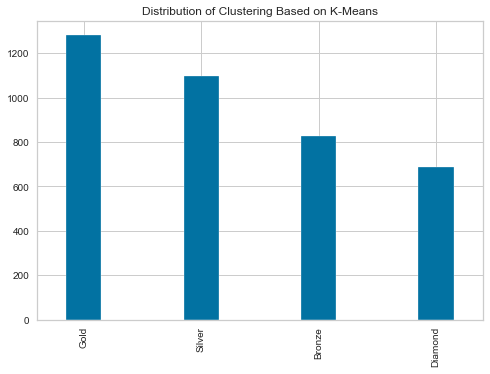

In [167]:
df_scaled.Kmeans_Label.value_counts().plot.bar(width=0.3)
plt.title('Distribution of Clustering Based on K-Means');

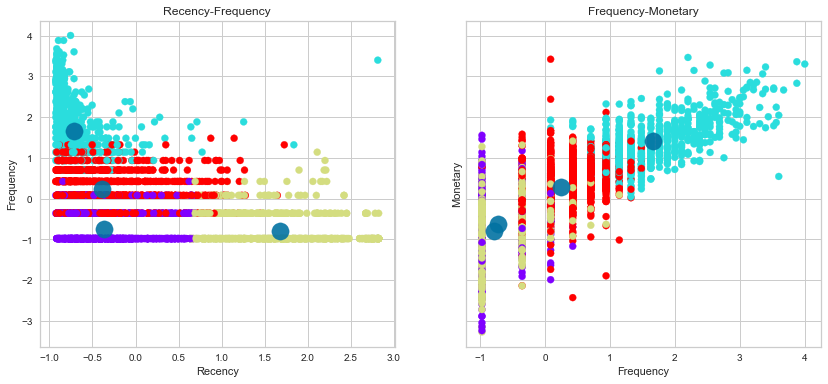

In [168]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6)) # sharey=True ile y eksen labels lari ortak kullanirlar.
ax1.set_title('Recency-Frequency')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,alpha=0.9, label = 'Centroids')

ax2.set_title("Frequency-Monetary")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.scatter(df_scaled.iloc[:,1],df_scaled.iloc[:,2],c=kmeans.labels_,cmap="rainbow")
ax2.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300,alpha=0.9, label = 'Centroids');

<Figure size 1080x1080 with 0 Axes>

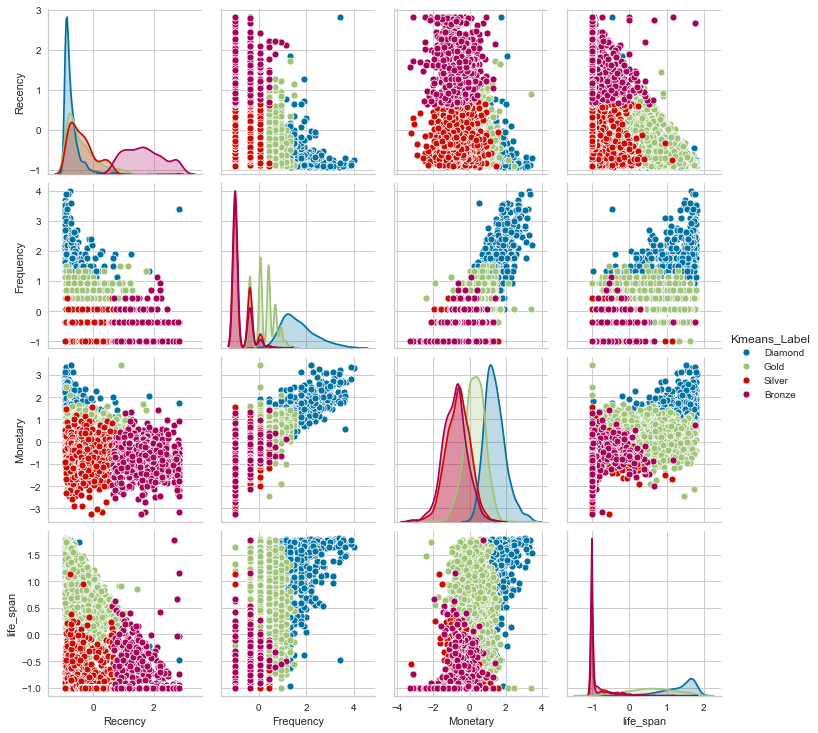

In [169]:
plt.figure(figsize=(15,15))
sns.pairplot(df_scaled[['Recency', 'Frequency', 'Monetary','life_span','Kmeans_Label']],hue='Kmeans_Label');

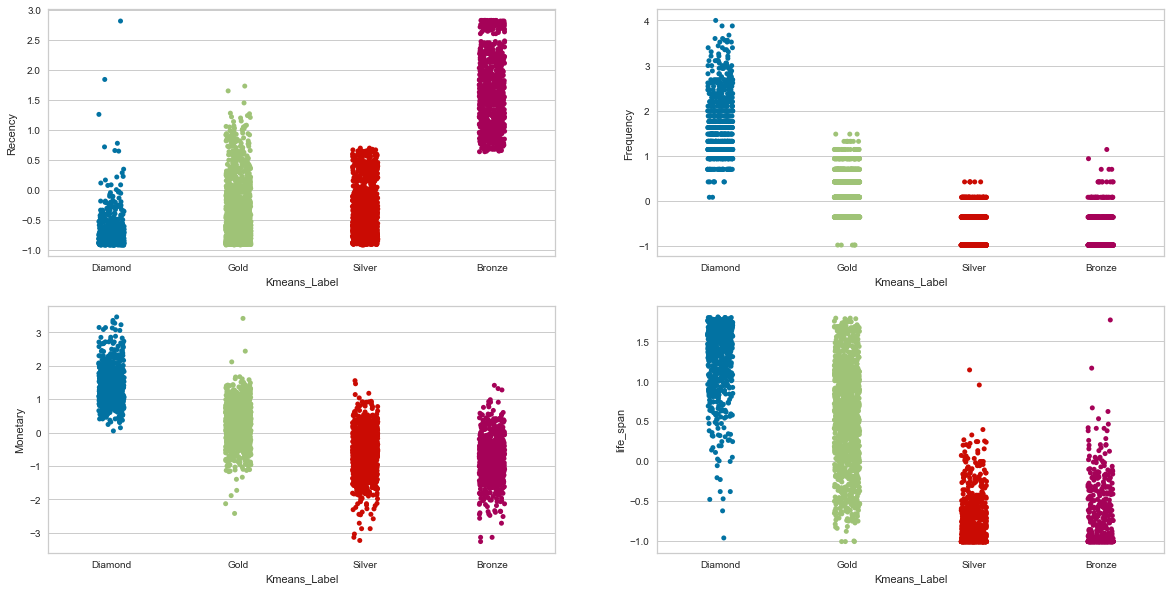

In [170]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.stripplot(df_scaled['Kmeans_Label'], df_scaled['Recency'])

plt.subplot(2,2,2)
sns.stripplot(df_scaled['Kmeans_Label'], df_scaled['Frequency'])

plt.subplot(2,2,3)
sns.stripplot(df_scaled['Kmeans_Label'], df_scaled['Monetary'])

plt.subplot(2,2,4)
sns.stripplot(df_scaled['Kmeans_Label'], df_scaled['life_span'])
plt.show()

Wir visualisieren Cluster-Id vs. Recency, Cluster-Id vs. Frequency und Cluster-Id vs. Monetary mit Hilfe des Box-Plots. Wir werten auch die Ergebnisse aus. 

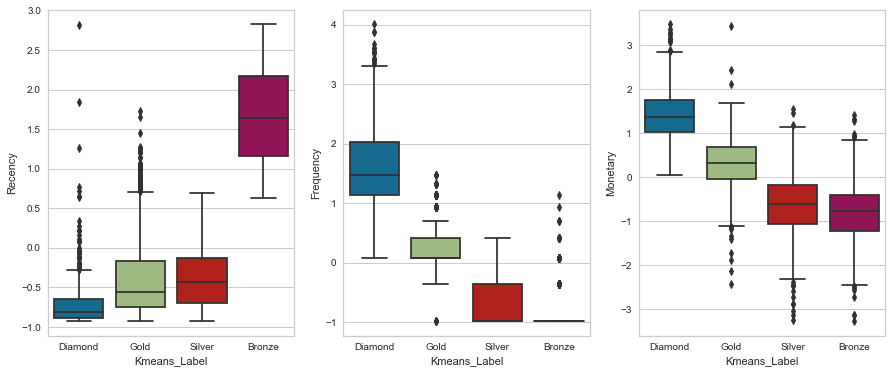

In [171]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(df_scaled['Kmeans_Label'], df_scaled['Recency'])

plt.subplot(1,3,2)
sns.boxplot(df_scaled['Kmeans_Label'], df_scaled['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(df_scaled['Kmeans_Label'], df_scaled['Monetary'])
plt.show()

In [174]:
RFM_Points_Segments=['1-Best Customers','2-Loyal Customers', '3-Big Spenders', '4-Almost Lost', '5-Lost Customers', '6-Lost Cheap Customers']
Kmeans_Label=['Diamond','Gold', 'Silver', 'Bronze']
pd.crosstab(df_scaled['Kmeans_Label'],rfm['RFM_Points_Segments'])[RFM_Points_Segments].loc[Kmeans_Label]

RFM_Points_Segments,1-Best Customers,2-Loyal Customers,3-Big Spenders,4-Almost Lost,5-Lost Customers,6-Lost Cheap Customers
Kmeans_Label,,,,,,
Diamond,376,204,108,0,0,0
Gold,27,95,579,459,122,1
Silver,0,0,69,254,566,208
Bronze,0,0,0,23,164,638


**Anmerkung:**

Einschränkungen von K-means clustering:

1. Es gibt keine Garantie, dass es zur global besten Lösung führt.
2. Kann nicht mit verschiedenen Formen umgehen (nicht kreisförmig) und die Wahrscheinlichkeit eines Punktes, zu mehr als einem Cluster zu gehören, nicht berücksichtigen.

Diese Nachteile von K-means zeigen, dass es für viele Datensätze (insbesondere niedrigdimensionale Datensätze) möglicherweise nicht so gut abschneidet, wie Sie hoffen.

# 5. Cohort & Conduct Cohort Analysis
Die [Kohortenanalyse] (https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) ist besonders nützlich bei der Analyse von Benutzerwachstumsmustern für Produkte. In Bezug auf ein Produkt kann eine Kohorte eine Gruppe von Personen mit dem gleichen Anmeldedatum, dem gleichen Nutzungsstartmonat/-datum oder der gleichen Traffic-Quelle sein.
Die Kohortenanalyse ist eine Analysemethode, mit der diese Gruppen über die Zeit verfolgt werden können, um wichtige Erkenntnisse zu gewinnen. Diese Analyse kann weiterhin zur Kundensegmentierung und zur Verfolgung von Metriken wie Kundenbindung, Kundenabwanderung und Lebenszeitwert verwendet werden.

Für E-Commerce-Unternehmen ist die Kohortenanalyse eine einzigartige Möglichkeit, um herauszufinden, welche Kunden für ihr Unternehmen am wertvollsten sind. Durch die Durchführung einer Kohortenanalyse können Sie Antworten auf folgende Fragen erhalten

- Wie effektiv war eine Marketingkampagne in einem bestimmten Zeitraum?
- Hat die Strategie zur Verbesserung der Konversionsrate von Kunden funktioniert?
- Sollte ich mich mehr auf die Kundenbindung als auf die Neukundenakquise konzentrieren?
- Sind meine Customer-Nurturing-Strategien effektiv?
- Welche Marketingkanäle bringen mir die besten Ergebnisse?
- Gibt es ein saisonales Muster im Kundenverhalten?
- Zusammen mit verschiedenen Leistungskennzahlen/Metriken für Ihr Unternehmen.

Da wir die Kohortenanalyse auf der Basis von Transaktionsdatensätzen von Kunden durchführen werden, werden wir uns hauptsächlich mit folgenden Spalten beschäftigen:
- Invoice Data
- CustomerID
- Price
- Quantity

Die folgenden Schritte werden durchgeführt, um das Kohortendiagramm der Retention Rate zu erstellen:
- Month Extraction aus der Spalte InvioceDate
- Zuweisung der Kohorte zu jeder Transaktion
- Zuweisung des Kohortenindex zu jeder Transaktion
- Berechnen der Anzahl der eindeutigen Kunden in jeder Gruppe von (ChortDate,Index)
- Erstellen der Kohortentabelle für die Retention Rate
- Erstellen des Kohortendiagramms unter Verwendung der Kohortentabelle

Die detaillierten Informationen zu den einzelnen Schritten finden wir unten:

## Future Engineering

###  Extrahierung des Monats des Kaufs
Zuerst werden wir eine Funktion erstellen, die ein beliebiges Datum annimmt und das formatierte Datum mit dem Tageswert als 1. des gleichen Monats und Jahres zurückgibt.

In [175]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [176]:
def extract_ym(df):
    # Extract year and month from the the column. strftim convert datetime to string 
    return df.apply(lambda x: x.strftime('%Y-%m')).astype('datetime64[ns]')

Nun werden wir die oben erstellte Funktion verwenden, um alle Rechnungsdaten in das jeweilige Monatsdatumsformat zu konvertieren.

In [177]:
extract_ym(df.InvoiceDate)

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [ ]:
# Alternative
f=lambda x:pd.to_datetime(x).dt.to_period('M')
f(df['InvoiceDate'])

### Berechnung des Zeitversatzes in Monaten, d. h. des Kohortenindex:
Die Berechnung des Zeitversatzes für jede Transaktion ermöglicht es uns, die Metriken für jede Kohorte auf vergleichbare Weise zu berichten.
Zunächst werden Sie 4 Variablen erstellen, die den ganzzahligen Wert von Jahren, Monaten für Rechnung und Kohortendatum mit der Funktion get_date_int() erfassen, die Sie weiter unten erstellen werden.

In [178]:
def get_date_int(df, column):
    years = df[column].dt.year
    months = df[column].dt.month
    return years, months

Mit dieser Funktion extrahieren wir die Integer-Werte für Rechnung sowie Kohortendatum in 3 getrennten Reihen für jede der beiden Spalten

In [ ]:
# Alternative
# df['InvoiceMonth']=extract_ym(df.InvoiceDate)

In [180]:
# # Apply Funktion auf invoice Date auf Spalte Invoice Month
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: datetime(x.year, x.month, 1) )
df['cohort_date'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [181]:
cohort_year, cohort_month = get_date_int(df, 'cohort_date')
invoice_year, invoice_month = get_date_int(df, 'InvoiceDate')

wir verwenden  die oben erstellten Variablen, um die Differenz in Tagen zu berechnen, und speichern sie in der Spalte Kohortenindex.

In [182]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

## Erstellt 1. Cohort: Kunden nummer & Retention Rate

### Pivot-Kohorte und Kohortenbeibehaltung

In [183]:
df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_preis,InvoiceMonth,cohort_date,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,2010-12-01,2010-12-01,1


In [184]:
# wir zählen monatlich aktive Kunden aus jeder Kohorte
grouping_count = df.groupby(['cohort_date', 'CohortIndex'])
cohort_data = grouping_count['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='cohort_date',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,948.000,362.000,317.000,367.000,341.000,376.000,360.000,336.000,336.000,374.000,354.000,474.000,260.000
2011-01-01,421.000,101.000,119.000,102.000,138.000,126.000,110.000,108.000,131.000,146.000,155.000,63.000,nan
2011-02-01,380.000,94.000,73.000,106.000,102.000,94.000,97.000,107.000,98.000,119.000,35.000,nan,nan
2011-03-01,440.000,84.000,112.000,96.000,102.000,78.000,116.000,105.000,127.000,39.000,nan,nan,nan
2011-04-01,299.000,68.000,66.000,63.000,62.000,71.000,69.000,78.000,25.000,nan,nan,nan,nan
2011-05-01,279.000,66.000,48.000,48.000,60.000,68.000,74.000,29.000,nan,nan,nan,nan,nan
2011-06-01,235.000,49.000,44.000,64.000,58.000,79.000,24.000,nan,nan,nan,nan,nan,nan
2011-07-01,191.000,40.000,39.000,44.000,52.000,22.000,nan,nan,nan,nan,nan,nan,nan
2011-08-01,167.000,42.000,42.000,42.000,23.000,nan,nan,nan,nan,nan,nan,nan,nan


In [185]:
# --Berechnung der Retention Rate--
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0).apply(lambda x: round(x,2))
retention.index = retention.index.strftime('%m-%Y')

In [186]:
retention.round(3) * 100 #um die Zahl als Prozentsatz anzuzeigen

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
12-2010,100.000,38.000,33.000,39.000,36.000,40.000,38.000,35.000,35.000,39.000,37.000,50.000,27.000
01-2011,100.000,24.000,28.000,24.000,33.000,30.000,26.000,26.000,31.000,35.000,37.000,15.000,nan
02-2011,100.000,25.000,19.000,28.000,27.000,25.000,26.000,28.000,26.000,31.000,9.000,nan,nan
03-2011,100.000,19.000,25.000,22.000,23.000,18.000,26.000,24.000,29.000,9.000,nan,nan,nan
04-2011,100.000,23.000,22.000,21.000,21.000,24.000,23.000,26.000,8.000,nan,nan,nan,nan
05-2011,100.000,24.000,17.000,17.000,22.000,24.000,27.000,10.000,nan,nan,nan,nan,nan
06-2011,100.000,21.000,19.000,27.000,25.000,34.000,10.000,nan,nan,nan,nan,nan,nan
07-2011,100.000,21.000,20.000,23.000,27.000,12.000,nan,nan,nan,nan,nan,nan,nan
08-2011,100.000,25.000,25.000,25.000,14.000,nan,nan,nan,nan,nan,nan,nan,nan


### Visualisierung der Analyse von Kohorte 1 mit den Modulen seaborn und matplotlib

In [187]:
retention.T.columns

Index(['12-2010', '01-2011', '02-2011', '03-2011', '04-2011', '05-2011', '06-2011', '07-2011', '08-2011', '09-2011', '10-2011', '11-2011', '12-2011'], dtype='object', name='cohort_date')

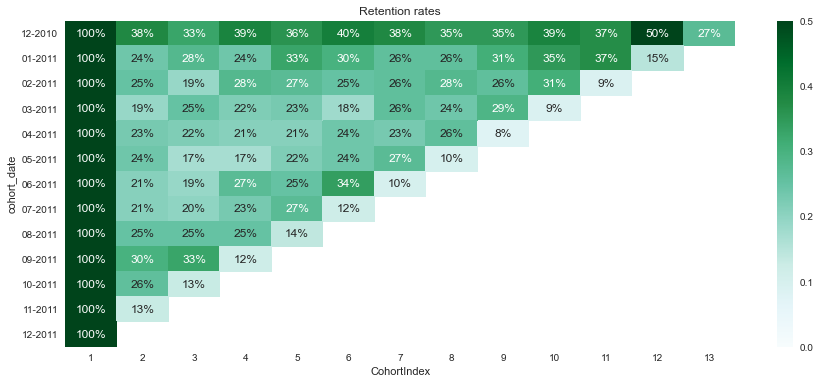

In [188]:
plt.figure(figsize=(15, 6))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

**Einblicke:**
* Aus dem obigen Diagramm können wir erkennen, dass mit der Zeit mehr Benutzer zum Kauf tendieren.
* Die Kohorte 12-2010 ist die stärkste. Die Kohorte 02-2011 und 04-2011 sind die schwächste Kohorte.

Text(0, 0.5, '% of Cohort Purchasing')

<Figure size 1080x432 with 0 Axes>

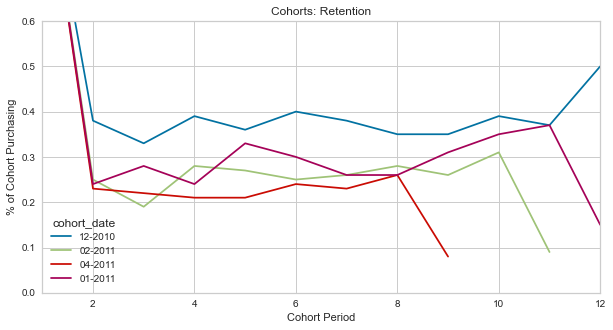

In [190]:
plt.figure(figsize=(15,6))
# retention[list(range(1,14))].plot(figsize=(10,5))
retention.loc[['12-2010', '02-2011', '04-2011','01-2011'],:].T.plot(figsize=(10,5))
# retention.iloc[:,:].T.plot(figsize=(10,5))
plt.title('Cohorts: Retention')
plt.xlim(1,12)
plt.ylim(0,0.6)
plt.xlabel('Cohort Period')
plt.ylabel('% of Cohort Purchasing')

## Erstellt die 2. Kohorte: Durchschnittlich verkaufte Menge

### i. Pivot Kohorte und Kohorte Retention

In [191]:
grouping_qty = df.groupby(['cohort_date', 'CohortIndex'])
cohort_data_qty = grouping_qty['Quantity'].mean()
cohort_data_qty = cohort_data_qty.reset_index()
average_quantity = cohort_data_qty.pivot(index='cohort_date',
                                     columns='CohortIndex',
                                     values='Quantity')
average_quantity.index = average_quantity.index.strftime('%m-%Y')

### Visualisierung der Analyse von Kohorte 2 mit den Modulen seaborn und matplotlib

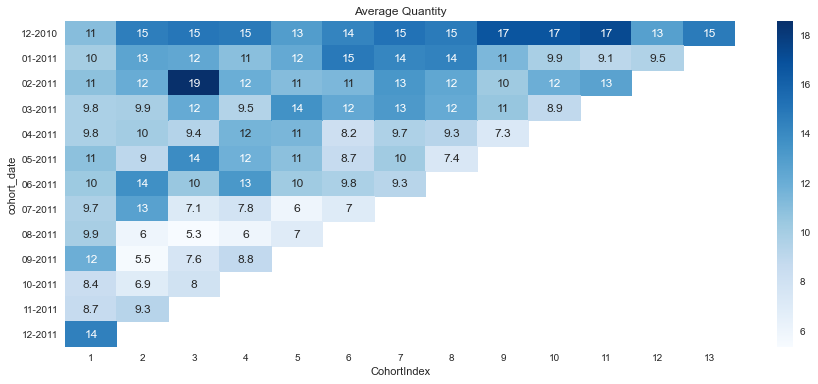

In [192]:
# Plot average quantity
plt.figure(figsize=(15, 6))
plt.title('Average Quantity')
sns.heatmap(data = average_quantity, annot=True, cmap='Blues')
plt.show()

## Erstellt 3. Kohorte: Durchschnittlicher Umsatz

### Pivot Kohorte and Kohorte Retention

In [193]:
##Durchschnittlicher Preis

In [196]:
grouping_price = df.groupby(['cohort_date', 'CohortIndex'])
cohort_data_price = grouping_price['total_preis'].mean()
cohort_data_price = cohort_data_price.reset_index()
average_price = cohort_data_price.pivot(index='cohort_date',
                                     columns='CohortIndex',
                                     values='total_preis')
average_price.index = average_price.index.strftime('%m-%Y')

### Visualisierung der Analyse von Kohorte 2 mit den Modulen seaborn und matplotlib

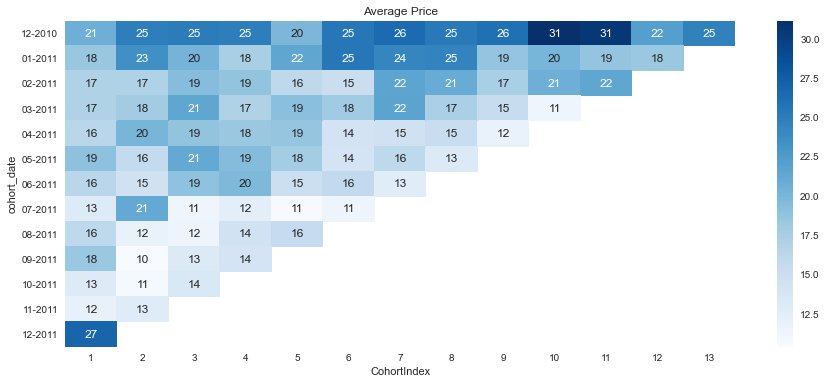

In [198]:
# Plot Durchschnittlicher Preis
plt.figure(figsize=(15, 6))
plt.title('Average Price')
sns.heatmap(data = average_price, annot=True, cmap='Blues')
plt.show()

Für E-Commerce-Organisationen ist die Kohortenanalyse eine einzigartige Möglichkeit, um herauszufinden, welche Kunden für ihr Geschäft am wertvollsten sind. Durch die Durchführung einer Kohortenanalyse können Sie Antworten auf folgende Fragen erhalten:

- Wie effektiv war eine Marketingkampagne in einem bestimmten Zeitraum?
- Hat die eingesetzte Strategie zur Verbesserung der Konversionsraten der Kunden funktioniert?
- Sollte ich mich mehr auf die Kundenbindung als auf die Gewinnung neuer Kunden konzentrieren?
- Sind meine Customer-Nurturing-Strategien effektiv?
- Welche Marketingkanäle bringen mir die besten Ergebnisse?
- Gibt es ein seasoanlity-Muster im Kundenverhalten?